# Research into Persistence

This notebook defines persistence in CS Department courses, then explores the rates of persistence for the CS major degree plan, then the IT degree plan before ultimately exploring relationships and findings in the data related to persistence as a whole.

## Set Up: Reading in and Cleaning Data

In [1055]:
#Importing packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1056]:
#Reads in course information
df = pd.read_csv('output_files/student_classes.csv')
df.head()

,EncryptId,Subject,Course,Section,Term,Course_Hours_Attempted,Mid_Term_Grade,Final_Grade,Meeting_Days,Start_Time,End_Time
0,6467132,ACC,343,1,201110,3,NaN,A,MW,1300.0,1415.0
1,6467132,ACC,453,1,201110,3,NaN,A,TR,1400.0,1515.0
2,6467132,ACC,457,1,201110,3,NaN,B,MW,1425.0,1540.0
3,6467132,ACC,465,1,201110,3,NaN,A,TR,1100.0,1215.0
4,6467132,COM,111,13,201110,3,NaN,A,M,1800.0,2030.0


In [1057]:
#Pulls all unique subjects so I can identify all of them that belong to the CS department
df['Subject'].unique()

array(['ACC', 'COM', 'SPH', 'CSC', 'BIO', 'HMS', 'RHB', 'BCM', 'GBU',
       'SPA', 'MTH', 'GEO', 'GIS', 'GOL', 'HIS', 'ECO', 'MGT', 'MKT',
       'AST', 'KIN', 'SPE', 'MUS', 'NUR', 'FIN', 'BLW', 'ENG', 'MCM',
       'ANS', 'PSC', 'ART', 'PHY', 'CHE', 'MTC', 'HSC', 'CJS', 'SOC',
       'PHI', 'PSY', 'MUP', 'PBA', 'ENV', 'FOR', 'AAS', 'THR', 'EPS',
       'RDG', 'SFA', 'EGR', 'ANT', 'AGM', 'MSC', 'GER', 'ILA', 'FRE',
       'DAN', 'ELE', 'MLG', 'HRT', 'SED', 'ECH', 'STA', 'LAT', 'AGR',
       'MHL', 'MUT', 'SWK', 'REL', 'AGN', 'PLS', 'AEC', 'SUS', 'POR',
       'AGD', 'IRW', 'ICC', 'HSR', 'DHH', 'DRAM', 'ENGL', 'ACCT', 'MATH',
       'MGMT', 'BUSI', 'BCOM', 'CSCI', 'ANTH', 'CRIJ', 'GEOG', 'CSIT',
       'ENGR', 'PHYS', 'BLAW', 'GERM', 'MUSI', 'FINC', 'ENVR', 'HIST',
       'MKTG', 'CHEM', 'GEOL', 'SPCH', 'LING', 'ARTS', 'SEED', 'SPAN',
       'MUEN', 'PSYC', 'MILS', 'ECON', 'GOVT', 'PHIL', 'FORS', 'GISC',
       'MCOM', 'BIOL', 'STAT', 'BAAS', 'COMM', 'ASTR', 'KINE', 'SFAS',
       'NUT

In [1058]:
#I decided on CSC, CSCI, CSIT and COSC
df = pd.DataFrame(df[(df['Subject'] == 'CSC') | (df['Subject'] == 'CSCI') | (df['Subject'] == 'CSIT') | (df['Subject'] == 'COSC')])
df['Subject'].unique()

array(['CSC', 'CSCI', 'CSIT', 'COSC'], dtype=object)

In [1059]:
#Reads in the data that I'll use to convert from 3 to 4 digits
course_mapping = pd.read_csv('datasets/TCCNS_Mapping.csv')
course_mapping.head()

,Prev. Course,TCCNS Course,Unnamed: 2,Unnamed: 3,TCCNS Name
0,ACC 231,ACCT 2301,ACCT,2301,Principles of Financial Accounting
1,ANT 231,ANTH 2351,ANTH,2351,Cultural Anthropology
2,ART 280,ARTS 1301,ARTS,1301,Art Appreciation
3,ART 281,ARTS 1303,ARTS,1303,Art History I (Prehistoric to the 14th century)
4,ART 282,ARTS 1304,ARTS,1304,Art History II (14th Century to the present)


In [1060]:
#Converts the columns in the course data to the format necessary for conversion
df['Course'] = df['Course'].astype(str)
df['Course_Old'] = df['Subject'] + " " + df['Course']

In [1061]:
df.head()

,EncryptId,Subject,Course,Section,Term,Course_Hours_Attempted,Mid_Term_Grade,Final_Grade,Meeting_Days,Start_Time,End_Time,Course_Old
8,4124661,CSC,241,1,201110,3,NaN,C,MWF,1000.0,1050.0,CSC 241
9,4124661,CSC,331,1,201110,3,NaN,C,TR,930.0,1045.0,CSC 331
10,4124661,CSC,343,1,201110,3,NaN,F,TR,1100.0,1215.0,CSC 343
18,185083,CSC,102,1,201110,3,NaN,W6,MWF,800.0,850.0,CSC 102
22,23547594,CSC,342,1,201110,3,NaN,B,MWF,1000.0,1050.0,CSC 342


In [1062]:
#While there is certainly a more efficient way to do this, it works
#this for loop goes through every row and if the course number is 3 digits, it maps the old course data to the new 
#course data
#Converts the columns in the course data to the format necessary for conversion
for index, row in df.iterrows():
    if (len(row['Course']) < 4):
        course_info = pd.DataFrame(course_mapping[course_mapping['Prev. Course'] == row['Course_Old']])
        new_subject = list(course_info['Unnamed: 2'].unique())
        new_course_num = list(course_info['Unnamed: 3'].unique())
        df.at[index, 'Subject'] = new_subject[0]
        df.at[index, 'Course'] = new_course_num[0]
        
df.head()
df['Course'] = df['Course'].astype(int)

In [1063]:
#Pulls in data on students, for now using it to get the students graduating degree
grad_info = pd.read_csv('output_files/student.csv')
grad_info.head()

,Unnamed: 0,EncryptId,Gender,Race_Ethnicity,First_Enroll_Term,Grad_Date,Grad_Term,Grad_Program,In_State_Res_Indicator,Student_Type_Code,...,Fathers_Highest_Ed_Lvl,Mothers_Highest_Ed_Lvl,Old_SAT_Total,New_SAT_Total,ACT_Composite,High_School_Percentile,High_School_Name,High_School_Grad_Date,TSI,Veteran_Indicator
0,1,30116194,M,White,201110,NaN,NaN,NaN,O,T,...,7,6,NaN,NaN,NaN,NaN,Elk City High School,01-MAY-03,CR,0
1,2,30102536,M,White,200710,18-DEC-10,201110.0,BA in History,NaN,M,...,0,0,1140.0,NaN,NaN,83.0,West Sabine High School,01-MAY-06,ES,0
2,3,30087858,M,Black or African American,201610,18-MAY-19,201920.0,BA in Information Technology,I,T,...,4,4,NaN,NaN,NaN,NaN,Lufkin High School,01-MAY-08,PI,0
3,4,30063028,M,White,201010,NaN,NaN,NaN,NaN,M,...,6,6,1030.0,NaN,NaN,79.0,Little Cypress-Mauriceville HS,01-MAY-09,EK,0
4,5,30021581,M,White,201610,12-DEC-20,202110.0,BS in Computer Science,NaN,M,...,4,6,NaN,NaN,27.0,93.0,Martinsville High School,26-MAY-16,EA,0


In [1064]:
#There are clearly a lot of degree programs that students have ended up in
grad_info['Grad_Program'].unique()

array([nan, 'BA in History', 'BA in Information Technology',
       'BS in Computer Science', 'BBA in General Business',
       'BS in Biochemistry', 'BA in CJUS Law Enforcement',
       'BS in Health Science', 'BBA in Finance', 'BBA in Management',
       'BS in Computer Info Systems', 'BA in Mass Communication',
       'BS in Geology', 'BBA in Human Resource Mgmt', 'BA in Art',
       'BS in Psychology', 'BFA in Art', 'BA in Economics',
       'BBA in Computer Info Systems', 'BSAG in Agri Engineering Tech',
       'BAAS in Applied Arts and Sci', 'BA in Journalism',
       'BS in Child Dev Living', 'BBA in Business Economics',
       'BS in Biology', 'BSW in Social Work',
       'BBA in International Business', 'BBA in Bus Comm & Corp Edu',
       'BA in Radio Television', 'BS in General Studies',
       'BFA in Creative Writing', 'BS in Kinesiology',
       'BBA in Accounting', 'BA in Art History',
       'BSIS INST Core Subjects 4-8', 'BS in Mathematics',
       'Bach of Applied Art

In [1065]:
#Determines how many student graduate from each degree program if they were ever CS Department majors
degrees = pd.DataFrame(grad_info.groupby('Grad_Program').agg({'EncryptId': 'count'}))

#Turns raw counts into a percentage with 1 decimal point
degrees['percent'] = degrees['EncryptId'] / degrees['EncryptId'].sum() * 100
degrees['percent'] = degrees['percent'].round(1)

degrees.head()

,EncryptId,percent
Grad_Program,,
BA in Art,4,0.7
BA in Art History,1,0.2
BA in CJUS Corrections,1,0.2
BA in CJUS Law Enforcement,4,0.7
BA in CJUS Legal Assistant,1,0.2


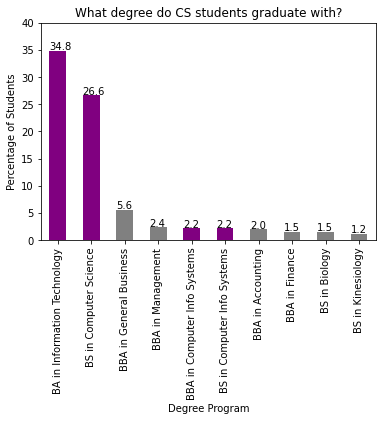

In [1066]:
#Finds the 10 most common degrees and creates a bar plot
common_degrees = pd.DataFrame(degrees.nlargest(10, 'percent', keep = 'first'))
common_degrees.reset_index(inplace = True)

ax = common_degrees.plot.bar(x = 'Grad_Program', y = 'percent', color=['purple', 'purple', 'grey', 'grey', 'purple', 'purple', 'grey', 'grey', 'grey', 'grey'])
ax.set_ylabel('Percentage of Students')
ax.set_ylim(0, 40)
ax.set_xlabel('Degree Program')
ax.set_title('What degree do CS students graduate with?')
ax.get_legend().remove()

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() - 0.005, p.get_height() + 0.2))

## Grouping Students by Major

In [1067]:
#Reads in the major history data file
major_history = pd.read_csv('output_files/major_history.csv')
major_history.head()

,Unnamed: 0,Encrypt Id,Major,Term
0,1,30116194,CSCI,201110
1,2,21570831,CISY,201110
2,3,21543443,MATH,200810
3,4,21543443,CSCI,200920
4,5,21543443,SOCI,201030


In [1068]:
#Prints unique majors
major_history['Major'].unique()

array(['CSCI', 'CISY', 'MATH', 'SOCI', 'ITEC', 'PBUS', 'FINC', 'OLCD',
       'PACC', 'GBUS', 'MGMT', 'ACCT', 'UNDD', 'FNTD', 'PROV', 'PREP',
       'PSCI', 'MKTG', 'THTR', 'BIOL', 'ENGL', 'AELI', 'AGMA', 'HIST',
       'ART', 'PSYC', 'RHBS', 'JOUR', 'ECON', 'CONC', 'PHYS', 'NURS',
       'BECO', 'KINE', 'HSCI', 'INTB', 'CJLA', 'CHEM', 'PUND', 'CDFL',
       'CWRI', 'CJCR', 'INST', 'AGAS', 'EVSC', 'PSTG', 'ELEM', 'CJLE',
       'BIOC', 'GEOL', 'HADM', 'RDTV', 'COMS', 'PSWK', 'INDS', 'APAS',
       'SPEC', 'PHIL', 'GEOG', 'TRAN', 'MUSC', 'PBAD', 'SCED', 'SPAN',
       'SWRK', 'ARTH', 'SPSC', 'POSC', 'MTHT', 'NSCI', 'AGHR', 'GCOM',
       'COMD', 'FRWM', 'HUSC', 'ENPH', 'PNUR', 'DGBU', 'BUAD', 'ECHS',
       'FORS', 'SPBM', 'AGET', 'NDGD', 'MDST', 'ELI', 'BCCE', 'LSTU',
       'CJUS', 'DINS', 'DATA', 'HUSR', 'LANG', 'MGHR', 'CCMG', 'AGEN',
       'CYSE', 'PAAS', 'SPCM', 'DBCC'], dtype=object)

In [1069]:
#Finds all students who have majored in CS
cs = major_history[major_history['Major'] == 'CSCI']
cs_students = set(cs['Encrypt Id'].unique())

In [1070]:
#Finds all students who have majored in IT 
it = major_history[major_history['Major'] == 'ITEC']
it_students = set(it['Encrypt Id'].unique())
it_students

{11629,
 37676,
 68999,
 225069,
 242597,
 247747,
 254849,
 286856,
 333623,
 385915,
 462814,
 471259,
 562160,
 572203,
 579196,
 756575,
 795564,
 815678,
 834007,
 878968,
 935086,
 958220,
 1056721,
 1173424,
 1227584,
 1271592,
 1336029,
 1364770,
 1420537,
 1493996,
 1513747,
 1531868,
 1859749,
 1956724,
 1970108,
 2078885,
 2126082,
 2175604,
 2200889,
 2212255,
 2317256,
 2354470,
 2386053,
 2401123,
 2456810,
 2468419,
 2538154,
 2539449,
 2584040,
 2588499,
 2600582,
 2610430,
 2626909,
 2874331,
 2885776,
 2905001,
 2950420,
 2974132,
 3078359,
 3202193,
 3233607,
 3257720,
 3262392,
 3351665,
 3385097,
 3397686,
 3405198,
 3426163,
 3457393,
 3506898,
 3530049,
 3562532,
 3637557,
 3659793,
 3660633,
 3689989,
 3756455,
 3853646,
 4035083,
 4035453,
 4070807,
 4086046,
 4179036,
 4225824,
 4446362,
 4559279,
 4584619,
 4748783,
 4787832,
 4801865,
 4873876,
 4876537,
 4941925,
 4944676,
 4980231,
 5095703,
 5156107,
 5209161,
 5225971,
 5264177,
 5292730,
 5310691,
 5541

In [1071]:
#Finds all students who have switched from CS to IT
cs_to_it_students = set()
for student in it_students:
    stu_df = pd.DataFrame(major_history[major_history['Encrypt Id'] == student])
    majors = list(stu_df['Major'].unique())
    if ('CSCI' in majors):
        cs_terms = stu_df[stu_df['Major'] == 'CSCI']['Term'].unique()
        it_terms = stu_df[stu_df['Major'] == 'ITEC']['Term'].unique()
        for it_term in it_terms:
            for cs_term in cs_terms:
                if (it_term > cs_term):
                    cs_to_it_students.add(student)
print(len(cs_to_it_students))

148


## Persistence Labels: Defining Persistence 

In [1072]:
#Creates a column that will be used to label students as either persisting or not in each course
df['persists'] = 'unk'
df.head()

,EncryptId,Subject,Course,Section,Term,Course_Hours_Attempted,Mid_Term_Grade,Final_Grade,Meeting_Days,Start_Time,End_Time,Course_Old,persists
8,4124661,CSCI,3302,1,201110,3,NaN,C,MWF,1000.0,1050.0,CSC 241,unk
9,4124661,CSCI,3331,1,201110,3,NaN,C,TR,930.0,1045.0,CSC 331,unk
10,4124661,CSCI,3343,1,201110,3,NaN,F,TR,1100.0,1215.0,CSC 343,unk
18,185083,CSCI,1302,1,201110,3,NaN,W6,MWF,800.0,850.0,CSC 102,unk
22,23547594,CSCI,3342,1,201110,3,NaN,B,MWF,1000.0,1050.0,CSC 342,unk


In [1073]:
#Fills in the Persistence Labels

#lists all of the options that we'll count as finishing in a CS Department Degree
CS_degrees = ['BA in Information Technology', 'BS in Computer Science', 'BS in Computer Info Systems', 'BBA in Computer Info Systems']

#for every row in the dataframe, execute this loop
for index, row in df.iterrows():
    
    #If the course is a senior level course
    y = int(row['Course'])
    if (y > 4000):
        
        #find the row of the student dataframe that contains info about this student
        student_dem_data = pd.DataFrame(grad_info[grad_info['EncryptId'] == row['EncryptId']])
        
        #pull their degree program from that row
        grad_prog = list(student_dem_data['Grad_Program'])
        
        #if their degree is one of the computer science degrees - they persist
        if (CS_degrees.count(grad_prog[0]) > 0):
            df.at[index, 'persists'] = 1
        
        else:    
            #otherwise, they do not
            df.at[index, 'persists'] = 0
    
    #if the student made a C or better in the course, consider them here
    elif (row['Final_Grade'] == 'A') | (row['Final_Grade'] == 'B') | (row['Final_Grade'] == 'C') | (row['Final_Grade'] == 'P'):
        
        #pulls a dataframe of all records for this student in the subject that this course is taught in
        all_enrollment = pd.DataFrame(df[(df['EncryptId'] == row['EncryptId']) & (df['Subject'] == row['Subject'])])
        
        #creates a list of all courses the student took in this section
        stu_courses = list(all_enrollment['Course']) 
        course_nums = [int(x) for x in stu_courses]
        
        #sees if the students took any courses at a higher level than the current course, if so - they persist
        if any(x > y for x in course_nums):
            df.at[index, 'persists'] = 1
                #find the row of the student dataframe that contains info about this student
        
        #if their degree is one of the computer science degrees - they persist
        elif (grad_prog[0] in CS_degrees):
            df.at[index, 'persists'] = 1
        
        #if the student didn't take any courses at a higher level in this subject, they did not persist
        else:
            df.at[index, 'persists'] = 0
            
    #if the student made less than a C in the course, consider them here
    else:
        
        #pulls a dataframe of all records for this student, in this subject and course
        all_enrollment = pd.DataFrame(df[(df['EncryptId'] == row['EncryptId']) & (df['Subject'] == row['Subject']) & (df['Course'] == row['Course'])])
        
        #makes a list of all terms that the student took this course
        terms = list(all_enrollment['Term'].unique())
        terms.sort()
        
        #calculates the number of terms a student had to enroll in this course
        num_tries = len(terms) - 1
        
        #finds out where (relative to the other attempts) this attempt at the course is
        location = terms.index(row['Term'])
        
        #if the student took the course more than once and has taken the course since the current attempt - they persist
        if ((len(all_enrollment) > 1) & (location < num_tries)):
            df.at[index, 'persists'] = 1
            
        #if the student has not taken the course again - they did not persist
        else:
            df.at[index, 'persists'] = 0

In [1074]:
#Ensures all rows were handled
df['persists'].unique()

array([1, 0], dtype=object)

In [1075]:
#Checks the range of included terms
df['Term'].unique()

array([201110, 201120, 201130, 201210, 201220, 201230, 201310, 201320,
       201330, 201340, 201410, 201420, 201425, 201430, 201440, 201510,
       201520, 201525, 201530, 201540, 201610, 201620, 201630, 201640,
       201710, 201720, 201730, 201740, 201810, 201820, 201830, 201840,
       201910, 201920, 201930, 201940, 202010, 202020, 202030, 202040,
       202110, 202120, 202130])

In [1076]:
#Can't consider the Spring and Summer because we don't have data on the following Fall to accurately calculate persistence
df = pd.DataFrame(df[(df['Term'] != 202120) & (df['Term'] != 202130)])

In [1077]:
#Baseline persistence for all department courses
print(df['persists'].sum()/len(df)*100)

85.27115858668857


In [1078]:
#Calculates the persistence rate for each course
df['Course'] = df['Course'].apply(lambda x: str(x))
persistence_rates = df.groupby(['Subject', 'Course']).agg({'persists': ['sum', 'count']})
persistence_rates['percent'] = (persistence_rates['persists']['sum'] / persistence_rates['persists']['count']) * 100

In [1079]:
#Views the persistence rates for every course
persistence_rates

persists           percent
                    sum count            
Subject Course                           
BCIS    1305        218   247   88.259109
COSC    1301        217   271   80.073801
CSCI    1302       1184  1428   82.913165
        2302        700   879   79.635950
        2311        716   857   83.547258
        2314        384   470   81.702128
        3185         18    18  100.000000
        3302        404   506   79.841897
        3321        207   253   81.818182
        3323        232   233   99.570815
        3331        263   310   84.838710
        3333        201   241   83.402490
        3341        148   162   91.358025
        3342        159   177   89.830508
        3343         16    24   66.666667
        4101         23    24   95.833333
        4111        340   364   93.406593
        4175         73    83   87.951807
        4325        147   167   88.023952
        4326        123   140   87.857143
        4331          6     7   85.714286
        4335        123   144   85.416667
        4341         30    34   88.235294
        4342         97   111   87.387387
        4347         70    75   93.333333
        5312          0     1    0.000000
CSIT    1300         78    94   82.978723
        2301        210   251   83.665339
        3340        468   536   87.313433
        3350        403   453   88.962472
        3351        267   289   92.387543
        3353        260   308   84.415584
        3355        144   179   80.446927
        4333         65    71   91.549296
        4352        167   179   93.296089
        4355        141   150   94.000000

In [1080]:
#Finds average persistence department wide
persistence_rates['percent'].mean()

84.60094189080155

## Visualizing Persistence

In [1081]:
# visualize the persistence rates
persistence_rates.reset_index(inplace = True)

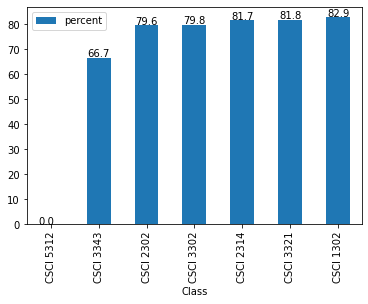

In [1082]:
# Visualizes lowest 7 persistence rates in CS courses
csci = persistence_rates[persistence_rates['Subject'] == 'CSCI']
low_7_csci = pd.DataFrame(csci.nsmallest(7, 'percent', keep = 'first'))

low_7_csci['Class'] = low_7_csci['Subject'] + " " + low_7_csci['Course']
low_7_csci['percent'] = low_7_csci['percent'].round(1)

ax = low_7_csci.plot.bar(x = 'Class', y = 'percent')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

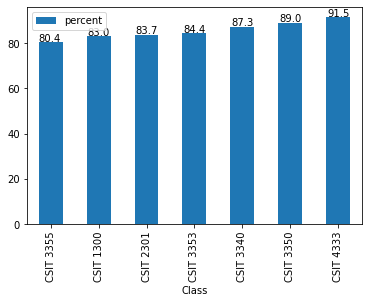

In [1083]:
# top 7 CSIT courses (lowest 7 persistence rates)
csci = persistence_rates[persistence_rates['Subject'] == 'CSIT']
low_7_csit = pd.DataFrame(csci.nsmallest(7, 'percent', keep = 'first'))

low_7_csit['Class'] = low_7_csit['Subject'] + " " + low_7_csit['Course']
low_7_csit['percent'] = low_7_csit['percent'].round(1)

ax = low_7_csit.plot.bar(x = 'Class', y = 'percent')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

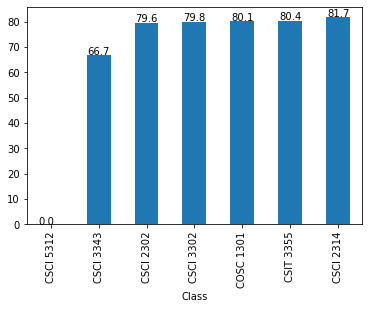

In [1084]:
# top 7 courses department-wide or overall
low_7_cs = pd.DataFrame(persistence_rates.nsmallest(7, 'percent', keep = 'first'))

low_7_cs['Class'] = low_7_cs['Subject'] + " " + low_7_cs['Course']
low_7_cs['percent'] = low_7_cs['percent'].round(1)

ax = low_7_cs.plot.bar(x = 'Class', y = 'percent', legend = False)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

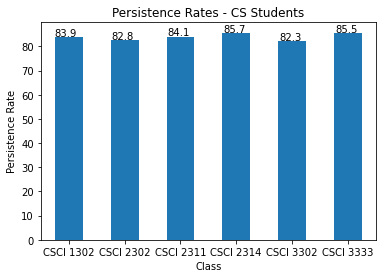

In [1085]:
# Isolating down to CS major prereqs/pipelines
# 1302, 2302, 2311, 2314, 3302, 3333

#Creates a method to be used to plot a bar chart for cs persistence in the major's biggest required coruses
def cs_bar_chart(data, col, students, title):
    data[col] = data['EncryptId'].apply(lambda x: x in students)
    csci = pd.DataFrame(data[data[col] == True])

    pre_reqs = pd.DataFrame(csci.where((csci['Course'] == '1302') | (csci['Course'] == '2302') | (csci['Course'] == '3302') | (csci['Course'] == '2311') | (csci['Course'] == '3333') | (csci['Course'] == '2314')))

    pre_reqs['Class'] = pre_reqs['Subject'] + " " + pre_reqs['Course']

    pre_req_persist = pre_reqs.groupby('Class').agg({'persists': ['sum', 'count']})
    pre_req_persist['percent'] = (pre_req_persist['persists']['sum'] / pre_req_persist['persists']['count']) * 100
    pre_req_persist['percent'] = pre_req_persist['percent'].round(1)
    pre_req_persist.reset_index(inplace=True)

    ax = pre_req_persist.plot.bar(x = 'Class', y = 'percent', legend = False, rot='0')
    ax.set_ylabel('Persistence Rate')
    ax.set_title(title)

    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
        
    return pre_req_persist

#Creates a method to be used to plot a heat map for cs persistence in the major's biggest required coruses
def heat_map(pre_req_persist):
    prereq = pd.DataFrame(pre_req_persist[['Class', 'percent']])
    prereq.set_index('Class', inplace = True)
    print(prereq)
    prereq = prereq.T
    sns.heatmap(prereq, annot=True)
    

pre_req_persist = cs_bar_chart(df, 'CS_Student', cs_students, 'Persistence Rates - CS Students')

          percent
                 
Class            
CSCI 1302    83.9
CSCI 2302    82.8
CSCI 2311    84.1
CSCI 2314    85.7
CSCI 3302    82.3
CSCI 3333    85.5


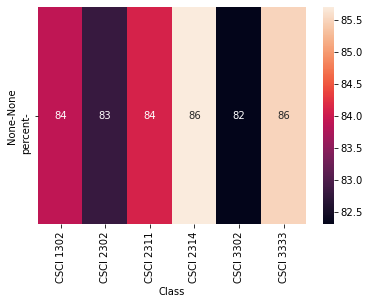

In [1086]:
heat_map(pre_req_persist)

/Users/rachel/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


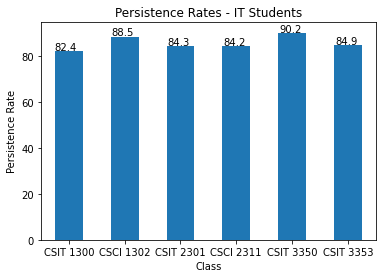

In [1087]:
# Isolating down to IT major prereqs/pipelines
# 1302, 1300, 2311, 2301, 3353, 3350

#Creates a method to be used to plot a bar chart for it persistence in the major's biggest required coruses
def it_bar_chart(data, col, student_list, title):
    data[col] = data['EncryptId'].apply(lambda x: x in student_list)
    it = pd.DataFrame(data[data[col] == True])

    pre_reqs = pd.DataFrame(it.where((it['Course'] == '1302') | (it['Course'] == '1300') | (it['Course'] == '2311') | (it['Course'] == '2301') | (it['Course'] == '3353') | (it['Course'] == '3350')))

    pre_reqs['Class'] = pre_reqs['Subject'] + " " + pre_reqs['Course']

    pre_req_persist = pre_reqs.groupby('Class').agg({'persists': ['sum', 'count']})
    pre_req_persist['percent'] = (pre_req_persist['persists']['sum'] / pre_req_persist['persists']['count']) * 100
    pre_req_persist['percent'] = pre_req_persist['percent'].round(1)
    pre_req_persist.reset_index(inplace=True)
    
    pre_req_persist['sort_col'] = 0
    classes = ['CSIT 1300', 'CSCI 1302', 'CSIT 2301', 'CSCI 2311', 'CSIT 3350', 'CSIT 3353']
    pre_req_persist['sort_col'] = pre_req_persist['Class'].apply(lambda x: classes.index(x))
    pre_req_persist.sort_values(by = 'sort_col', inplace = True)
    pre_req_persist.drop(['sort_col'], axis = 1, inplace = True)

    ax = pre_req_persist.plot.bar(x = 'Class', y = 'percent', legend = False, rot='0')
    ax.set_ylabel('Persistence Rate')
    ax.set_title(title)

    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
        
    return pre_req_persist

#Creates a method to be used to plot a heat map for it persistence in the major's biggest required coruses
def it_heat_map(pre_req_persist):
    prereq = pd.DataFrame(pre_req_persist[['Class', 'percent']])
    prereq.set_index('Class', inplace = True)
    print(prereq)
    prereq = prereq.T
    sns.heatmap(prereq, annot=True)

pre_req_persist = it_bar_chart(df, 'IT_Student', it_students, 'Persistence Rates - IT Students')

          percent
                 
Class            
CSIT 1300    82.4
CSCI 1302    88.5
CSIT 2301    84.3
CSCI 2311    84.2
CSIT 3350    90.2
CSIT 3353    84.9


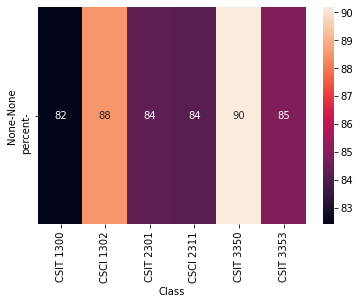

In [1088]:
it_heat_map(pre_req_persist)

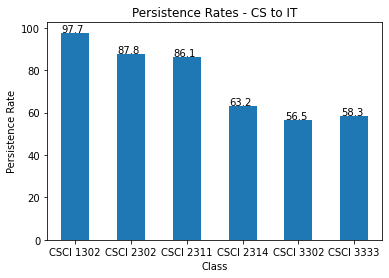

In [1089]:
#repeats process above for cs majors but only considers the students who eventually switch to it
pre_req_persist = cs_bar_chart(df, 'CS_to_IT_Student', cs_to_it_students, 'Persistence Rates - CS to IT')

          percent
                 
Class            
CSCI 1302    97.7
CSCI 2302    87.8
CSCI 2311    86.1
CSCI 2314    63.2
CSCI 3302    56.5
CSCI 3333    58.3


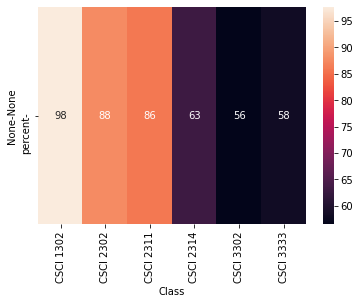

In [1090]:
heat_map(pre_req_persist)

## DFW Rates

In [1091]:
df.head()

,EncryptId,Subject,Course,Section,Term,Course_Hours_Attempted,Mid_Term_Grade,Final_Grade,Meeting_Days,Start_Time,End_Time,Course_Old,persists,CS_Student,IT_Student,CS_to_IT_Student
8,4124661,CSCI,3302,1,201110,3,NaN,C,MWF,1000.0,1050.0,CSC 241,1,True,False,False
9,4124661,CSCI,3331,1,201110,3,NaN,C,TR,930.0,1045.0,CSC 331,1,True,False,False
10,4124661,CSCI,3343,1,201110,3,NaN,F,TR,1100.0,1215.0,CSC 343,1,True,False,False
18,185083,CSCI,1302,1,201110,3,NaN,W6,MWF,800.0,850.0,CSC 102,0,False,False,False
22,23547594,CSCI,3342,1,201110,3,NaN,B,MWF,1000.0,1050.0,CSC 342,1,False,False,False


In [1092]:
df['Final_Grade'].unique()

array(['C', 'F', 'W6', 'B', 'A', 'D', 'QF', 'W', nan, 'WP', 'P', 'WF'],
      dtype=object)

In [1093]:
#Gathers all of the students who got a D, F or W into a dataframe and calculates persistence for each course
#on this limited group of students
dfw_df = pd.DataFrame(df[(df['Final_Grade'] == 'F') | (df['Final_Grade'] == 'D') | (df['Final_Grade'] == 'W6') | (df['Final_Grade'] == 'W') | (df['Final_Grade'] == 'WF') | (df['Final_Grade'] == 'WP')])
dfw_df['Course'] = dfw_df['Course'].apply(lambda x: str(x))
persistence_rates = dfw_df.groupby(['Subject', 'Course']).agg({'persists': ['sum', 'count']})
persistence_rates['percent'] = (persistence_rates['persists']['sum'] / persistence_rates['persists']['count']) * 100
persistence_rates

persists           percent
                    sum count            
Subject Course                           
BCIS    1305          6    16   37.500000
COSC    1301         17    33   51.515152
CSCI    1302        259   463   55.939525
        2302        159   326   48.773006
        2311        137   254   53.937008
        2314         89   162   54.938272
        3302        112   195   57.435897
        3321         18    58   31.034483
        3323          3     4   75.000000
        3331         15    56   26.785714
        3333         22    53   41.509434
        3341         13    26   50.000000
        3342         23    40   57.500000
        3343          1     9   11.111111
        4111         22    25   88.000000
        4175          2     5   40.000000
        4325          8    16   50.000000
        4326          1     3   33.333333
        4331          0     1    0.000000
        4335          6    16   37.500000
        4341          4     8   50.000000
        4342          3     6   50.000000
        4347          5     8   62.500000
CSIT    1300          4    12   33.333333
        2301         53    88   60.227273
        3340         63   105   60.000000
        3350         29    50   58.000000
        3351         12    31   38.709677
        3353         31    72   43.055556
        3355          5    38   13.157895
        4333          4     4  100.000000
        4352         27    31   87.096774
        4355          1     1  100.000000

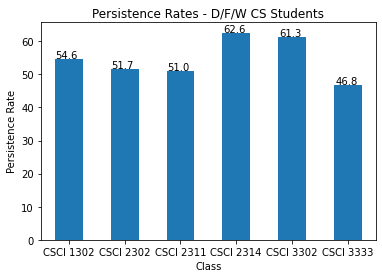

In [1094]:
pre_req_persist = cs_bar_chart(dfw_df, 'CS_Student', cs_students, 'Persistence Rates - D/F/W CS Students')

          percent
                 
Class            
CSCI 1302    54.6
CSCI 2302    51.7
CSCI 2311    51.0
CSCI 2314    62.6
CSCI 3302    61.3
CSCI 3333    46.8


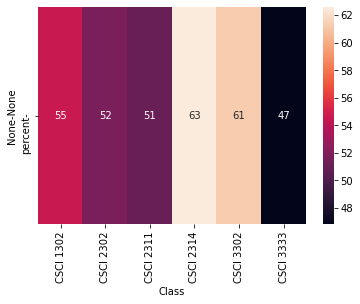

In [1095]:
heat_map(pre_req_persist)

/Users/rachel/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


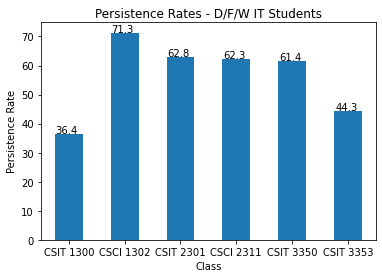

In [1096]:
pre_req_persist = it_bar_chart(dfw_df, 'IT_Student', it_students, 'Persistence Rates - D/F/W IT Students')

          percent
                 
Class            
CSIT 1300    36.4
CSCI 1302    71.3
CSIT 2301    62.8
CSCI 2311    62.3
CSIT 3350    61.4
CSIT 3353    44.3


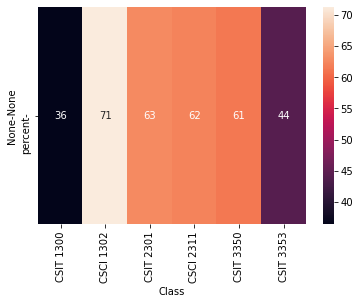

In [1097]:
it_heat_map(pre_req_persist)

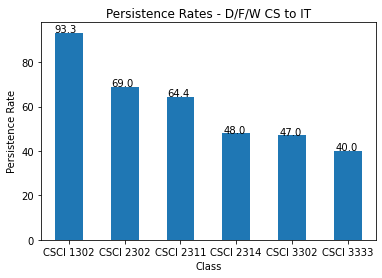

In [1098]:
pre_req_persist = cs_bar_chart(dfw_df, 'CS_to_IT_Student', cs_to_it_students, 'Persistence Rates - D/F/W CS to IT')

          percent
                 
Class            
CSCI 1302    93.3
CSCI 2302    69.0
CSCI 2311    64.4
CSCI 2314    48.0
CSCI 3302    47.0
CSCI 3333    40.0


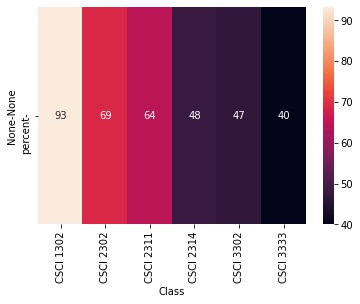

In [1099]:
heat_map(pre_req_persist)

In [1100]:
#Creates a 1 or a 0 marking each record in the original dataframe as D/F/W or A/B/C/P
def dfw(grade):
    if (grade != 'A') & (grade != 'B') & (grade != 'C') & (grade != 'P'):
        return 1
    else:
        return 0

df = pd.DataFrame(df)
df['DFW'] = df['Final_Grade'].apply(lambda x: dfw(x))

In [1101]:
#Recalculates persistence and the DFW rate
dfw_vs_persist = df.groupby(['Subject', 'Course']).agg({'EncryptId': 'count', 'persists': 'sum', 'DFW': 'sum'})
dfw_vs_persist['persistrate'] = dfw_vs_persist['persists'] / dfw_vs_persist['EncryptId'] * 100
dfw_vs_persist['DFWrate'] = dfw_vs_persist['DFW'] / dfw_vs_persist['EncryptId'] * 100
dfw_vs_persist

EncryptId  persists  DFW  persistrate    DFWrate
Subject Course                                                  
BCIS    1305          247       218   17    88.259109   6.882591
COSC    1301          271       217   35    80.073801  12.915129
CSCI    1302         1428      1184  523    82.913165  36.624650
        2302          879       700  349    79.635950  39.704209
        2311          857       716  290    83.547258  33.838973
        2314          470       384  188    81.702128  40.000000
        3185           18        18    0   100.000000   0.000000
        3302          506       404  237    79.841897  46.837945
        3321          253       207   66    81.818182  26.086957
        3323          233       232    4    99.570815   1.716738
        3331          310       263   63    84.838710  20.322581
        3333          241       201   63    83.402490  26.141079
        3341          162       148   28    91.358025  17.283951
        3342          177       159   44    89.830508  24.858757
        3343           24        16    9    66.666667  37.500000
        4101           24        23    0    95.833333   0.000000
        4111          364       340   25    93.406593   6.868132
        4175           83        73    7    87.951807   8.433735
        4325          167       147   20    88.023952  11.976048
        4326          140       123    3    87.857143   2.142857
        4331            7         6    1    85.714286  14.285714
        4335          144       123   18    85.416667  12.500000
        4341           34        30    8    88.235294  23.529412
        4342          111        97    7    87.387387   6.306306
        4347           75        70    8    93.333333  10.666667
        5312            1         0    0     0.000000   0.000000
CSIT    1300           94        78   18    82.978723  19.148936
        2301          251       210  101    83.665339  40.239044
        3340          536       468  125    87.313433  23.320896
        3350          453       403   73    88.962472  16.114790
        3351          289       267   35    92.387543  12.110727
        3353          308       260   80    84.415584  25.974026
        3355          179       144   39    80.446927  21.787709
        4333           71        65    5    91.549296   7.042254
        4352          179       167   34    93.296089  18.994413
        4355          150       141    1    94.000000   0.666667

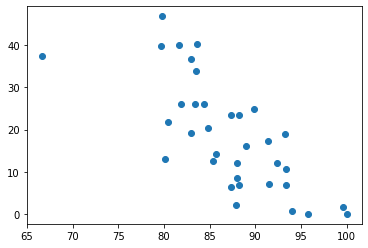

In [1102]:
#Plots persistence versus DFW rates while ignoring the grad-level outlier with 0% persistence or D/F/W
dfw_vs_persist.reset_index(inplace = True)
dfw_vs_persist = dfw_vs_persist[(dfw_vs_persist['Course'] != '5312')]
plt.figure()
plt.scatter(x = 'persistrate', y = 'DFWrate', data = dfw_vs_persist)
plt.show()

## EDA relating to Persistence

Question 1: Is high school performance indicitative of success?

In [1103]:
grad_info.head()

,Unnamed: 0,EncryptId,Gender,Race_Ethnicity,First_Enroll_Term,Grad_Date,Grad_Term,Grad_Program,In_State_Res_Indicator,Student_Type_Code,...,Fathers_Highest_Ed_Lvl,Mothers_Highest_Ed_Lvl,Old_SAT_Total,New_SAT_Total,ACT_Composite,High_School_Percentile,High_School_Name,High_School_Grad_Date,TSI,Veteran_Indicator
0,1,30116194,M,White,201110,NaN,NaN,NaN,O,T,...,7,6,NaN,NaN,NaN,NaN,Elk City High School,01-MAY-03,CR,0
1,2,30102536,M,White,200710,18-DEC-10,201110.0,BA in History,NaN,M,...,0,0,1140.0,NaN,NaN,83.0,West Sabine High School,01-MAY-06,ES,0
2,3,30087858,M,Black or African American,201610,18-MAY-19,201920.0,BA in Information Technology,I,T,...,4,4,NaN,NaN,NaN,NaN,Lufkin High School,01-MAY-08,PI,0
3,4,30063028,M,White,201010,NaN,NaN,NaN,NaN,M,...,6,6,1030.0,NaN,NaN,79.0,Little Cypress-Mauriceville HS,01-MAY-09,EK,0
4,5,30021581,M,White,201610,12-DEC-20,202110.0,BS in Computer Science,NaN,M,...,4,6,NaN,NaN,27.0,93.0,Martinsville High School,26-MAY-16,EA,0


In [1104]:
grad_info.columns

Index(['Unnamed: 0', 'EncryptId', 'Gender', 'Race_Ethnicity',
       'First_Enroll_Term', 'Grad_Date', 'Grad_Term', 'Grad_Program',
       'In_State_Res_Indicator', 'Student_Type_Code', 'Admit_Code',
       'Incoming_GPA', 'Incoming_SFA_Hours', 'First_Gen_Status',
       'Fathers_Highest_Ed_Lvl', 'Mothers_Highest_Ed_Lvl', 'Old_SAT_Total',
       'New_SAT_Total', 'ACT_Composite', 'High_School_Percentile',
       'High_School_Name', 'High_School_Grad_Date', 'TSI',
       'Veteran_Indicator'],
      dtype='object')

In [1105]:
#Standardizes the SAT/ACT scores onto a scale of 100
grad_info['Old_SAT_Total'] = grad_info['Old_SAT_Total']/1600 * 100
grad_info['New_SAT_Total'] = grad_info['New_SAT_Total']/1600 * 100
grad_info['ACT_Composite'] = grad_info['ACT_Composite']/36 * 100
print(grad_info['High_School_Percentile'].isna().sum()/len(grad_info))

0.31353767560664114


In [1108]:
#Calculates an average entrance exam score (can average now that all are on a 100 point scale)
grad_info['Entrance_Exam'] = None
for index, row in grad_info.iterrows():
    scores = list()
    if(pd.notnull(row['Old_SAT_Total'])):
        scores.append(row['Old_SAT_Total'])
    if(pd.notnull(row['New_SAT_Total'])):
        scores.append(row['New_SAT_Total'])
    if(pd.notnull(row['ACT_Composite'])):
        scores.append(row['ACT_Composite'])
    if (len(scores) > 0):
        grad_info.at[index, 'Entrance_Exam'] = sum(scores)/len(scores)
grad_info['Entrance_Exam'] = grad_info['Entrance_Exam'] * 100

In [1110]:
#Creates a new dataframe with only the necessary columns and drops the rows with missing values in one or more of those
#columns
visual_1 = pd.DataFrame(grad_info[['Entrance_Exam', 'High_School_Percentile', 'Grad_Program']])
visual_1.dropna(inplace=True)

#Returns a 1 if the degree is in Comp Sci and a 0 otherwise
def cs_only(degree):
    if (degree == 'BS in Computer Science'):
        return 1
    else:
        return 0

#Returns a 1 if the degree is a department major otherwise a 0
def cs_grad(degree):
    if (degree == 'BA in Information Technology') | (degree == 'BS in Computer Science') | (degree == 'BS in Computer Info Systems') | (degree == 'BBA in Computer Info Systems'):
        return 1
    else:
        return 0

#creates a new column using the second method above
visual_1['CS_Grad'] = visual_1['Grad_Program'].apply(lambda x: cs_only(x))
#creates a new column using the first method above
visual_1['Grad_Program'] = visual_1['Grad_Program'].apply(lambda x: cs_grad(x))

In [1111]:
#The results of the above cell
visual_1.head()

,Entrance_Exam,High_School_Percentile,Grad_Program,CS_Grad
1,7125,83.0,0,0
4,7500,93.0,1,1
6,5809.03,32.0,0,0
10,5250,62.0,0,0
13,4875,27.0,1,0


In [1112]:
#Generates a list of colors based on the values (0's or 1's) for the scatter plots
def colors(values):
    cols = list()
    for item in values:
        if (item == 1):
            cols.append('purple')
        elif (item == 0):
            cols.append('red')
        else:
            cols.append('blue')
    return cols

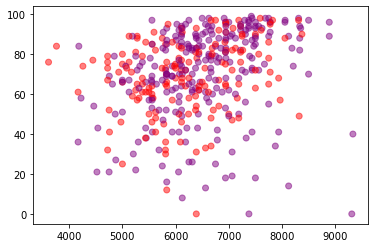

In [1113]:
#Plots a scatter plot of entrance exam versus high school percentile and colors by whether or not the student graduated
#with any department degree
plt.figure()
plt.scatter(x = 'Entrance_Exam', y = 'High_School_Percentile', c = colors(visual_1['Grad_Program']), alpha = 0.5, data = visual_1)
plt.show()

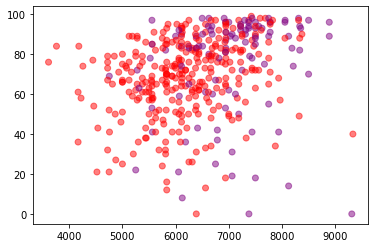

In [1114]:
#Plots a scatter plot of entrance exam versus high school percentile and colors by whether or not the student graduated
#with a CS degree
plt.figure()
plt.scatter(x = 'Entrance_Exam', y = 'High_School_Percentile', c = colors(visual_1['CS_Grad']), alpha = 0.5, data = visual_1)
plt.show()

Question 2: Are certain modalities better for student success than others?

In [902]:
df.head()

,EncryptId,Subject,Course,Section,Term,Course_Hours_Attempted,Mid_Term_Grade,Final_Grade,Meeting_Days,Start_Time,End_Time,Course_Old,persists,IT_Student,CS_Student,CS_to_IT_Student
8,4124661,CSCI,3302,1,201110,3,NaN,C,MWF,1000.0,1050.0,CSC 241,1,False,True,False
9,4124661,CSCI,3331,1,201110,3,NaN,C,TR,930.0,1045.0,CSC 331,1,False,True,False
10,4124661,CSCI,3343,1,201110,3,NaN,F,TR,1100.0,1215.0,CSC 343,1,False,True,False
18,185083,CSCI,1302,1,201110,3,NaN,W6,MWF,800.0,850.0,CSC 102,0,False,False,False
22,23547594,CSCI,3342,1,201110,3,NaN,B,MWF,1000.0,1050.0,CSC 342,1,False,False,False


In [903]:
#Creates a new column that will be used to find modality
df['Course'] = df['Course'].apply(lambda x: str(x))
df['Section'] = df['Section'].apply(lambda x: str(x))
df['Term'] = df['Term'].apply(lambda x: str(x))
df['course_lookup'] = df['Subject'] + " " + df['Course'] + " " + df['Section'] + " " + df['Term']
df.head()

,EncryptId,Subject,Course,Section,Term,Course_Hours_Attempted,Mid_Term_Grade,Final_Grade,Meeting_Days,Start_Time,End_Time,Course_Old,persists,IT_Student,CS_Student,CS_to_IT_Student,course_lookup
8,4124661,CSCI,3302,1,201110,3,NaN,C,MWF,1000.0,1050.0,CSC 241,1,False,True,False,CSCI 3302 1 201110
9,4124661,CSCI,3331,1,201110,3,NaN,C,TR,930.0,1045.0,CSC 331,1,False,True,False,CSCI 3331 1 201110
10,4124661,CSCI,3343,1,201110,3,NaN,F,TR,1100.0,1215.0,CSC 343,1,False,True,False,CSCI 3343 1 201110
18,185083,CSCI,1302,1,201110,3,NaN,W6,MWF,800.0,850.0,CSC 102,0,False,False,False,CSCI 1302 1 201110
22,23547594,CSCI,3342,1,201110,3,NaN,B,MWF,1000.0,1050.0,CSC 342,1,False,False,False,CSCI 3342 1 201110


In [904]:
#Reads in the file with info on courses (modalities included)
courses = pd.read_csv('output_files/courses.csv')
courses.head()

,Term Code,Subject,Course,Section,Campus,Modality,Meeting Days,Start Date,End Date,Start Time,End Time
0,201110,CSC,101,6,On Main Campus,Traditional|Face to face,TR,30-AUG-10,18-DEC-10,1230.0,1345.0
1,201110,CSC,121,1,On Main Campus,Traditional|Face to face,MWF,30-AUG-10,18-DEC-10,800.0,850.0
2,201110,CSC,241,1,On Main Campus,Traditional|Face to face,MWF,30-AUG-10,18-DEC-10,1000.0,1050.0
3,201110,CSC,331,1,On Main Campus,Traditional|Face to face,TR,30-AUG-10,18-DEC-10,930.0,1045.0
4,201110,CSC,343,1,On Main Campus,Traditional|Face to face,TR,30-AUG-10,18-DEC-10,1100.0,1215.0


In [905]:
#Have some three digit courses so need to convert to 4
courses['Subject'].unique()

array(['CSC', 'CSCI', 'CSIT', 'COSC'], dtype=object)

In [906]:
#3 to 4 digit conversion
courses['Course'] = courses['Course'].apply(lambda x: str(x))
courses['Course_Old'] = courses['Subject'] + " " + courses['Course']

for index, row in courses.iterrows():
    if (len(row['Course']) < 4):
        course_info = pd.DataFrame(course_mapping[course_mapping['Prev. Course'] == row['Course_Old']])
        new_subject = list(course_info['Unnamed: 2'].unique())
        new_course_num = list(course_info['Unnamed: 3'].unique())
        courses.at[index, 'Subject'] = new_subject[0]
        courses.at[index, 'Course'] = new_course_num[0]
        
courses.head()

,Term Code,Subject,Course,Section,Campus,Modality,Meeting Days,Start Date,End Date,Start Time,End Time,Course_Old
0,201110,COSC,1301,6,On Main Campus,Traditional|Face to face,TR,30-AUG-10,18-DEC-10,1230.0,1345.0,CSC 101
1,201110,BCIS,1305,1,On Main Campus,Traditional|Face to face,MWF,30-AUG-10,18-DEC-10,800.0,850.0,CSC 121
2,201110,CSCI,3302,1,On Main Campus,Traditional|Face to face,MWF,30-AUG-10,18-DEC-10,1000.0,1050.0,CSC 241
3,201110,CSCI,3331,1,On Main Campus,Traditional|Face to face,TR,30-AUG-10,18-DEC-10,930.0,1045.0,CSC 331
4,201110,CSCI,3343,1,On Main Campus,Traditional|Face to face,TR,30-AUG-10,18-DEC-10,1100.0,1215.0,CSC 343


In [907]:
#Creates a lookup column in the courses file (the one we'll pair with what we did above)
courses['Course'] = courses['Course'].apply(lambda x: str(x))
courses['Section'] = courses['Section'].apply(lambda x: str(x))
courses['Term Code'] = courses['Term Code'].apply(lambda x: str(x))
courses['course_lookup'] = courses['Subject'] + " " + courses['Course'] + " " + courses['Section'] + " " + courses['Term Code']
courses.head()

,Term Code,Subject,Course,Section,Campus,Modality,Meeting Days,Start Date,End Date,Start Time,End Time,Course_Old,course_lookup
0,201110,COSC,1301,6,On Main Campus,Traditional|Face to face,TR,30-AUG-10,18-DEC-10,1230.0,1345.0,CSC 101,COSC 1301 6 201110
1,201110,BCIS,1305,1,On Main Campus,Traditional|Face to face,MWF,30-AUG-10,18-DEC-10,800.0,850.0,CSC 121,BCIS 1305 1 201110
2,201110,CSCI,3302,1,On Main Campus,Traditional|Face to face,MWF,30-AUG-10,18-DEC-10,1000.0,1050.0,CSC 241,CSCI 3302 1 201110
3,201110,CSCI,3331,1,On Main Campus,Traditional|Face to face,TR,30-AUG-10,18-DEC-10,930.0,1045.0,CSC 331,CSCI 3331 1 201110
4,201110,CSCI,3343,1,On Main Campus,Traditional|Face to face,TR,30-AUG-10,18-DEC-10,1100.0,1215.0,CSC 343,CSCI 3343 1 201110


In [908]:
#Uses the course_lookup column to find the course in the courses file, extract it's modality and return it
def course_modality(course):
    class_offering = pd.DataFrame(courses[courses['course_lookup'] == course])
    lst = list(class_offering['Modality'].unique())
    if (len(lst) > 0):
        return lst[0]
    else:
        return None
df['modality'] = df['course_lookup'].apply(lambda x: course_modality(x))
df.head()

,EncryptId,Subject,Course,Section,Term,Course_Hours_Attempted,Mid_Term_Grade,Final_Grade,Meeting_Days,Start_Time,End_Time,Course_Old,persists,IT_Student,CS_Student,CS_to_IT_Student,course_lookup,modality
8,4124661,CSCI,3302,1,201110,3,NaN,C,MWF,1000.0,1050.0,CSC 241,1,False,True,False,CSCI 3302 1 201110,Traditional|Face to face
9,4124661,CSCI,3331,1,201110,3,NaN,C,TR,930.0,1045.0,CSC 331,1,False,True,False,CSCI 3331 1 201110,Traditional|Face to face
10,4124661,CSCI,3343,1,201110,3,NaN,F,TR,1100.0,1215.0,CSC 343,1,False,True,False,CSCI 3343 1 201110,Traditional|Face to face
18,185083,CSCI,1302,1,201110,3,NaN,W6,MWF,800.0,850.0,CSC 102,0,False,False,False,CSCI 1302 1 201110,Traditional|Face to face
22,23547594,CSCI,3342,1,201110,3,NaN,B,MWF,1000.0,1050.0,CSC 342,1,False,False,False,CSCI 3342 1 201110,Traditional|Face to face


In [909]:
df['modality'].unique()

array(['Traditional|Face to face', 'Multiple or other electronic',
       'Online', None, 'Hybrid'], dtype=object)

In [910]:
#Creates a new dataframe with the info we need to make the visual
visual_2 = pd.DataFrame(df[['EncryptId', 'persists', 'CS_Student', 'IT_Student', 'CS_to_IT_Student', 'Final_Grade', 'modality']])
visual_2.head()

,EncryptId,persists,CS_Student,IT_Student,CS_to_IT_Student,Final_Grade,modality
8,4124661,1,True,False,False,C,Traditional|Face to face
9,4124661,1,True,False,False,C,Traditional|Face to face
10,4124661,1,True,False,False,F,Traditional|Face to face
18,185083,0,False,False,False,W6,Traditional|Face to face
22,23547594,1,False,False,False,B,Traditional|Face to face


In [911]:
#Calculates persistance by grouping based on the category provided
visual_2.dropna(inplace = True)
def generate_persistence_table(data, col):
    persist_table = pd.DataFrame(data.groupby(col).agg({'persists': ['sum', 'count']}))
    persist_table['percent'] = (persist_table['persists']['sum'] / persist_table['persists']['count']) * 100
    persist_table['percent'] = persist_table['percent'].round(1)
    return persist_table

In [912]:
#persistence calculations
mod_persist = generate_persistence_table(visual_2, 'modality')
mod_persist

persists       percent
                                  sum count        
modality                                           
Hybrid                            385   467    82.4
Multiple or other electronic       51    54    94.4
Online                            774   882    87.8
Traditional|Face to face         7079  8300    85.3

In [913]:
#visualizes persistence using table generated in previous cells but need to also pass the name of the column
#as index that you used to group by in the previous method
def generate_persistence_plot(data, index):
    data_to_plot = data.reset_index()
    ax = data_to_plot.plot.bar(x = index, y = 'percent', legend = False)

    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

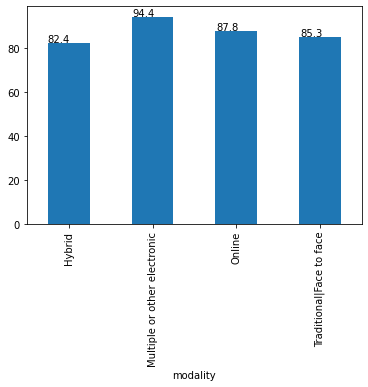

In [914]:
#visualizes persistence
generate_persistence_plot(mod_persist, 'modality')

In [915]:
#repeats persistence calcs for only CS major students
cs_persist = generate_persistence_table(pd.DataFrame(visual_2[visual_2['CS_Student'] == True]), 'modality')
cs_persist

persists       percent
                                  sum count        
modality                                           
Hybrid                            291   355    82.0
Multiple or other electronic       21    22    95.5
Online                            415   468    88.7
Traditional|Face to face         4853  5579    87.0

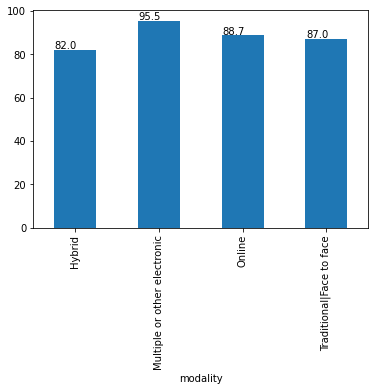

In [916]:
#visualizes persistence
generate_persistence_plot(cs_persist, 'modality')

In [917]:
#persistence calcs for only it students
it_persist = generate_persistence_table(pd.DataFrame(visual_2[visual_2['IT_Student'] == True]), 'modality')
it_persist

persists       percent
                                  sum count        
modality                                           
Hybrid                            113   134    84.3
Multiple or other electronic       45    47    95.7
Online                            566   637    88.9
Traditional|Face to face         3152  3722    84.7

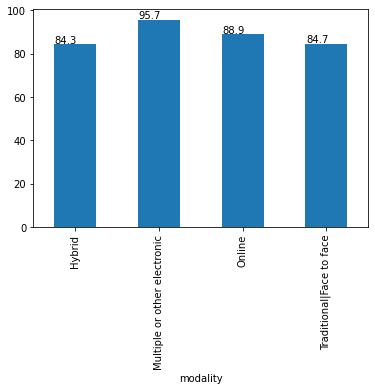

In [918]:
#visualizes based on table
generate_persistence_plot(it_persist, 'modality')

In [919]:
#persistence by modality for CS to IT students
cs_to_it_persist = generate_persistence_table(pd.DataFrame(visual_2[visual_2['CS_to_IT_Student'] == True]), 'modality')
cs_to_it_persist

persists       percent
                                  sum count        
modality                                           
Hybrid                             48    58    82.8
Multiple or other electronic       15    15   100.0
Online                            219   239    91.6
Traditional|Face to face         1285  1493    86.1

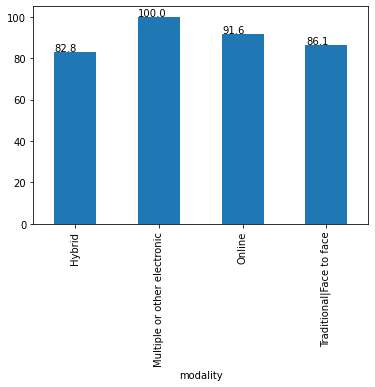

In [920]:
generate_persistence_plot(cs_to_it_persist, 'modality')

Question 3: Is family education indicative of success?

In [921]:
#Gets the education level files
ed_level = pd.read_csv('output_files/mother_ed.csv')
ed_level

,Mothers_Highest_Ed_Lvl,Mothers_Ed_Lvl_Desc
0,6,Some College
1,0,Missing data - NaN
2,4,High School diploma or GED
3,13,Graduate/Professional degree
4,8,Bachelor's/four-year degree
5,7,Associate/two-year degree
6,3,Some High School/no diploma
7,1,No High School


In [922]:
#Regroups ed levels where 0 = no college, 1 = some college, 2 = complete college
ed_levels = {0: 0, 1: 0, 3: 0, 4: 0, 6: 1, 7: 1, 8: 2, 13: 2}

In [923]:
df.head()

,EncryptId,Subject,Course,Section,Term,Course_Hours_Attempted,Mid_Term_Grade,Final_Grade,Meeting_Days,Start_Time,End_Time,Course_Old,persists,IT_Student,CS_Student,CS_to_IT_Student,course_lookup,modality
8,4124661,CSCI,3302,1,201110,3,NaN,C,MWF,1000.0,1050.0,CSC 241,1,False,True,False,CSCI 3302 1 201110,Traditional|Face to face
9,4124661,CSCI,3331,1,201110,3,NaN,C,TR,930.0,1045.0,CSC 331,1,False,True,False,CSCI 3331 1 201110,Traditional|Face to face
10,4124661,CSCI,3343,1,201110,3,NaN,F,TR,1100.0,1215.0,CSC 343,1,False,True,False,CSCI 3343 1 201110,Traditional|Face to face
18,185083,CSCI,1302,1,201110,3,NaN,W6,MWF,800.0,850.0,CSC 102,0,False,False,False,CSCI 1302 1 201110,Traditional|Face to face
22,23547594,CSCI,3342,1,201110,3,NaN,B,MWF,1000.0,1050.0,CSC 342,1,False,False,False,CSCI 3342 1 201110,Traditional|Face to face


In [924]:
grad_info.head()

,Unnamed: 0,EncryptId,Gender,Race_Ethnicity,First_Enroll_Term,Grad_Date,Grad_Term,Grad_Program,In_State_Res_Indicator,Student_Type_Code,...,Mothers_Highest_Ed_Lvl,Old_SAT_Total,New_SAT_Total,ACT_Composite,High_School_Percentile,High_School_Name,High_School_Grad_Date,TSI,Veteran_Indicator,Entrance_Exam
0,1,30116194,M,White,201110,NaN,NaN,NaN,O,T,...,6,NaN,NaN,NaN,NaN,Elk City High School,01-MAY-03,CR,0,NaN
1,2,30102536,M,White,200710,18-DEC-10,201110.0,BA in History,NaN,M,...,0,0.71250,NaN,NaN,83.0,West Sabine High School,01-MAY-06,ES,0,71.25
2,3,30087858,M,Black or African American,201610,18-MAY-19,201920.0,BA in Information Technology,I,T,...,4,NaN,NaN,NaN,NaN,Lufkin High School,01-MAY-08,PI,0,NaN
3,4,30063028,M,White,201010,NaN,NaN,NaN,NaN,M,...,6,0.64375,NaN,NaN,79.0,Little Cypress-Mauriceville HS,01-MAY-09,EK,0,64.375
4,5,30021581,M,White,201610,12-DEC-20,202110.0,BS in Computer Science,NaN,M,...,6,NaN,NaN,0.75,93.0,Martinsville High School,26-MAY-16,EA,0,75


In [925]:
grad_info.columns

Index(['Unnamed: 0', 'EncryptId', 'Gender', 'Race_Ethnicity',
       'First_Enroll_Term', 'Grad_Date', 'Grad_Term', 'Grad_Program',
       'In_State_Res_Indicator', 'Student_Type_Code', 'Admit_Code',
       'Incoming_GPA', 'Incoming_SFA_Hours', 'First_Gen_Status',
       'Fathers_Highest_Ed_Lvl', 'Mothers_Highest_Ed_Lvl', 'Old_SAT_Total',
       'New_SAT_Total', 'ACT_Composite', 'High_School_Percentile',
       'High_School_Name', 'High_School_Grad_Date', 'TSI', 'Veteran_Indicator',
       'Entrance_Exam'],
      dtype='object')

In [926]:
#gathers in data for parent data analysis
parent_ed = pd.DataFrame(grad_info[['EncryptId', 'Mothers_Highest_Ed_Lvl', 'Fathers_Highest_Ed_Lvl','High_School_Percentile', 'Grad_Program']])
parent_ed = pd.DataFrame(parent_ed[parent_ed['Fathers_Highest_Ed_Lvl'] != 0])
parent_ed = pd.DataFrame(parent_ed[parent_ed['Mothers_Highest_Ed_Lvl'] != 0])
parent_ed.head()

,EncryptId,Mothers_Highest_Ed_Lvl,Fathers_Highest_Ed_Lvl,High_School_Percentile,Grad_Program
0,30116194,6,7,NaN,NaN
2,30087858,4,4,NaN,BA in Information Technology
3,30063028,6,6,79.0,NaN
4,30021581,6,4,93.0,BS in Computer Science
5,30018214,13,8,NaN,BS in Computer Science


In [927]:
#Regroups using the dictionary defined above (ed_levels)
parent_ed['Mothers_Highest_Ed_Lvl'] = parent_ed['Mothers_Highest_Ed_Lvl'].apply(lambda x: ed_levels[x])
parent_ed['Fathers_Highest_Ed_Lvl'] = parent_ed['Fathers_Highest_Ed_Lvl'].apply(lambda x: ed_levels[x])

parent_ed['Average_Parent_Ed_Lvl'] = parent_ed['Mothers_Highest_Ed_Lvl'] + parent_ed['Fathers_Highest_Ed_Lvl'] / 2

In [928]:
#Generates the 1's and 0's indicating if the student is a comp sci major or department major
parent_ed['CS_Grad'] = parent_ed['Grad_Program'].apply(lambda x: cs_only(x))
parent_ed['Grad_Program'] = parent_ed['Grad_Program'].apply(lambda x: cs_grad(x))

In [931]:
import numpy as np
#groups the given dataframe (data) according to a column (col1) then aggregates the values based on col2
def generate_percentage_table(data, col1, col2):
    percent_table = pd.DataFrame(data.groupby(col1).agg({col2: ['sum', 'count']}))
    percent_table['percent'] = (percent_table[col2]['sum'] / percent_table[col2]['count']) * 100
    percent_table['percent'] = percent_table['percent'].round(1)
    return percent_table

#uses the percentage table to make a bar chart
def generate_percentage_plot(data, index):
    data_to_plot = data.reset_index()
    ax = data_to_plot.plot.bar(x = index, y = 'percent', legend = False)

    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
    return ax

<AxesSubplot:xlabel='Mothers_Highest_Ed_Lvl'>

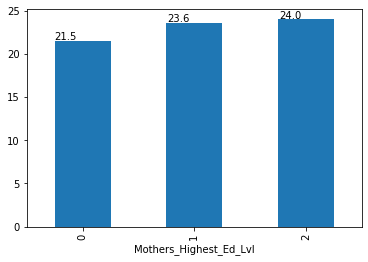

In [932]:
#Plots graduation rates for all department majors based on mother's education level 
_ = generate_percentage_table(parent_ed, 'Mothers_Highest_Ed_Lvl', 'Grad_Program')
_.reset_index(inplace = True)
generate_percentage_plot(_, 'Mothers_Highest_Ed_Lvl')

<AxesSubplot:xlabel='Fathers_Highest_Ed_Lvl'>

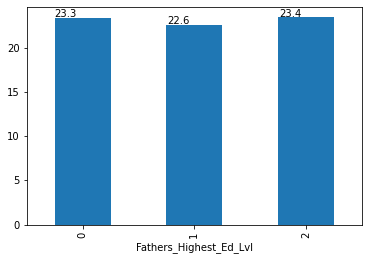

In [933]:
#Graduation rates for all department majors based on father's education level
_ = generate_percentage_table(parent_ed, 'Fathers_Highest_Ed_Lvl', 'Grad_Program')
generate_percentage_plot(_, 'Fathers_Highest_Ed_Lvl')

In [934]:
#Pulls the mother or father's education level from the parent_ed dataframe to add to the comprehensive df
def ed_level(student, parent):
    student_record = pd.DataFrame(parent_ed[parent_ed['EncryptId'] == student])
    lst = list(student_record[parent].unique())
    if (len(lst) > 0):
        return lst[0]
    else:
        return None
df['Mother_Ed'] = df['EncryptId'].apply(lambda x: ed_level(x, 'Mothers_Highest_Ed_Lvl'))
df['Father_Ed'] = df['EncryptId'].apply(lambda x: ed_level(x, 'Fathers_Highest_Ed_Lvl'))
df.head()

,EncryptId,Subject,Course,Section,Term,Course_Hours_Attempted,Mid_Term_Grade,Final_Grade,Meeting_Days,Start_Time,End_Time,Course_Old,persists,IT_Student,CS_Student,CS_to_IT_Student,course_lookup,modality,Mother_Ed,Father_Ed
8,4124661,CSCI,3302,1,201110,3,NaN,C,MWF,1000.0,1050.0,CSC 241,1,False,True,False,CSCI 3302 1 201110,Traditional|Face to face,NaN,NaN
9,4124661,CSCI,3331,1,201110,3,NaN,C,TR,930.0,1045.0,CSC 331,1,False,True,False,CSCI 3331 1 201110,Traditional|Face to face,NaN,NaN
10,4124661,CSCI,3343,1,201110,3,NaN,F,TR,1100.0,1215.0,CSC 343,1,False,True,False,CSCI 3343 1 201110,Traditional|Face to face,NaN,NaN
18,185083,CSCI,1302,1,201110,3,NaN,W6,MWF,800.0,850.0,CSC 102,0,False,False,False,CSCI 1302 1 201110,Traditional|Face to face,NaN,NaN
22,23547594,CSCI,3342,1,201110,3,NaN,B,MWF,1000.0,1050.0,CSC 342,1,False,False,False,CSCI 3342 1 201110,Traditional|Face to face,NaN,NaN


In [935]:
#Makes a new dataframe with what we need for this visual
visual_3 = pd.DataFrame(df[['EncryptId', 'Mother_Ed', 'Father_Ed', 'persists']])
visual_3.dropna(inplace = True)
visual_3['Mother_Ed'] = visual_3['Mother_Ed'].apply(lambda x: int(x))
visual_3['Father_Ed'] = visual_3['Father_Ed'].apply(lambda x: int(x))

<AxesSubplot:xlabel='Father_Ed'>

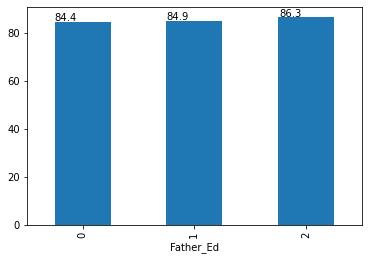

In [936]:
#Persistence rates by father ed level
_ = generate_percentage_table(visual_3, 'Father_Ed', 'persists')
generate_percentage_plot(_, 'Father_Ed')

<AxesSubplot:xlabel='Mother_Ed'>

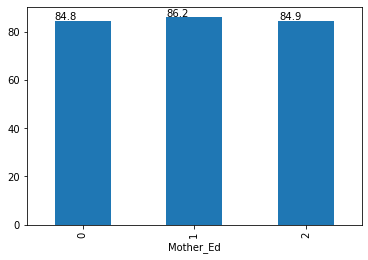

In [937]:
#Persistence rates by mother ed level
_ = generate_percentage_table(visual_3, 'Mother_Ed', 'persists')
generate_percentage_plot(_, 'Mother_Ed')

In [939]:
#Combines mother and father into one column
visual_3['Combo_Ed'] = -1

for index, row in visual_3.iterrows():
    #neither parent has college
    if (row['Mother_Ed'] == 0) & (row['Father_Ed'] == 0):
        visual_3.at[index, 'Combo_Ed'] = 1
    #one parent has no college
    elif (row['Mother_Ed'] == 0) | (row['Father_Ed'] == 0):
        visual_3.at[index, 'Combo_Ed'] = 0
    #both parents have incomplete college
    elif (row['Mother_Ed'] == 1) & (row['Father_Ed'] == 1):
        visual_3.at[index, 'Combo_Ed'] = 3
    #one parent has incomplete college
    elif (row['Mother_Ed'] == 1) | (row['Father_Ed'] == 1):
        visual_3.at[index, 'Combo_Ed'] = 2
    #either parent has complete college
    elif (row['Mother_Ed'] == 2) | (row['Father_Ed'] == 2):
        visual_3.at[index, 'Combo_Ed'] = 4

In [940]:
visual_3['Combo_Ed'].unique()

array([2, 0, 4, 3, 1])

<AxesSubplot:xlabel='Combo_Ed'>

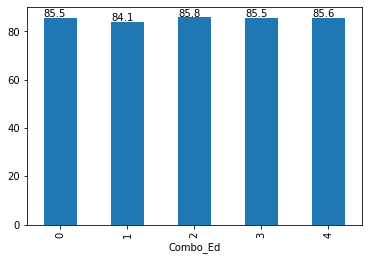

In [941]:
#Persistence rate by grouped parent ed
_ = generate_percentage_table(visual_3, 'Combo_Ed', 'persists')
generate_percentage_plot(_, 'Combo_Ed')

Question 4: How has persistence changed over time?

In [942]:
df.head()

,EncryptId,Subject,Course,Section,Term,Course_Hours_Attempted,Mid_Term_Grade,Final_Grade,Meeting_Days,Start_Time,End_Time,Course_Old,persists,IT_Student,CS_Student,CS_to_IT_Student,course_lookup,modality,Mother_Ed,Father_Ed
8,4124661,CSCI,3302,1,201110,3,NaN,C,MWF,1000.0,1050.0,CSC 241,1,False,True,False,CSCI 3302 1 201110,Traditional|Face to face,NaN,NaN
9,4124661,CSCI,3331,1,201110,3,NaN,C,TR,930.0,1045.0,CSC 331,1,False,True,False,CSCI 3331 1 201110,Traditional|Face to face,NaN,NaN
10,4124661,CSCI,3343,1,201110,3,NaN,F,TR,1100.0,1215.0,CSC 343,1,False,True,False,CSCI 3343 1 201110,Traditional|Face to face,NaN,NaN
18,185083,CSCI,1302,1,201110,3,NaN,W6,MWF,800.0,850.0,CSC 102,0,False,False,False,CSCI 1302 1 201110,Traditional|Face to face,NaN,NaN
22,23547594,CSCI,3342,1,201110,3,NaN,B,MWF,1000.0,1050.0,CSC 342,1,False,False,False,CSCI 3342 1 201110,Traditional|Face to face,NaN,NaN


In [943]:
#Extracts the type of term from the term code (last 2 digits)
df['Semester_Type'] = df['Term'].apply(lambda x: x[4:])
df.head()

,EncryptId,Subject,Course,Section,Term,Course_Hours_Attempted,Mid_Term_Grade,Final_Grade,Meeting_Days,Start_Time,...,Course_Old,persists,IT_Student,CS_Student,CS_to_IT_Student,course_lookup,modality,Mother_Ed,Father_Ed,Semester_Type
8,4124661,CSCI,3302,1,201110,3,NaN,C,MWF,1000.0,...,CSC 241,1,False,True,False,CSCI 3302 1 201110,Traditional|Face to face,NaN,NaN,10
9,4124661,CSCI,3331,1,201110,3,NaN,C,TR,930.0,...,CSC 331,1,False,True,False,CSCI 3331 1 201110,Traditional|Face to face,NaN,NaN,10
10,4124661,CSCI,3343,1,201110,3,NaN,F,TR,1100.0,...,CSC 343,1,False,True,False,CSCI 3343 1 201110,Traditional|Face to face,NaN,NaN,10
18,185083,CSCI,1302,1,201110,3,NaN,W6,MWF,800.0,...,CSC 102,0,False,False,False,CSCI 1302 1 201110,Traditional|Face to face,NaN,NaN,10
22,23547594,CSCI,3342,1,201110,3,NaN,B,MWF,1000.0,...,CSC 342,1,False,False,False,CSCI 3342 1 201110,Traditional|Face to face,NaN,NaN,10


In [944]:
#Creates a dataframe with all records from a fall or spring semester
fall_spring = pd.DataFrame(df[(df['Semester_Type'] == '10') | (df['Semester_Type'] == '20')])
_ = generate_percentage_table(fall_spring, 'Term', 'persists')
_

persists       percent
            sum count        
Term                         
201110      223   265    84.2
201120      215   254    84.6
201210      273   311    87.8
201220      292   347    84.1
201310      318   360    88.3
201320      275   372    73.9
201410      352   417    84.4
201420      314   394    79.7
201510      379   450    84.2
201520      354   453    78.1
201610      421   486    86.6
201620      449   523    85.9
201710      452   502    90.0
201720      462   517    89.4
201810      472   555    85.0
201820      412   475    86.7
201910      426   488    87.3
201920      432   504    85.7
202010      414   462    89.6
202020      416   506    82.2
202110      399   486    82.1

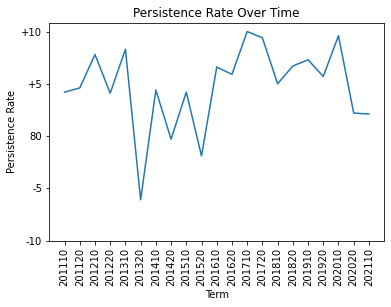

In [945]:
#Plots persistence over all fall and spring semesters in dataset
plt.figure()
_ = _.reset_index()
plt.plot('Term', 'percent', data = _)
plt.yticks(ticks = [70, 75, 80, 85, 90], labels = ['-10', '-5', '80', '+5', '+10'])
plt.title('Persistence Rate Over Time')
plt.ylabel('Persistence Rate')
plt.xlabel('Term')
plt.xticks(rotation=90)
plt.show()

In [946]:
#Groups by term type and calculates persistence rate
sems = generate_percentage_table(df, 'Semester_Type', 'persists')
sems

persists       percent
                   sum count        
Semester_Type                       
10                4129  4782    86.3
20                3621  4345    83.3
25                   4     7    57.1
30                 272   290    93.8
40                 276   312    88.5

<AxesSubplot:xlabel='Semester_Type'>

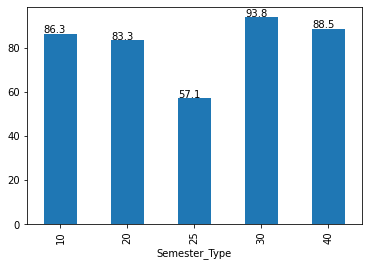

In [947]:
#Visualizes persistence by term type
generate_percentage_plot(sems, 'Semester_Type')

Question 5: How much can we know about student success by mid-terms?

In [948]:
df.head()

,EncryptId,Subject,Course,Section,Term,Course_Hours_Attempted,Mid_Term_Grade,Final_Grade,Meeting_Days,Start_Time,...,Course_Old,persists,IT_Student,CS_Student,CS_to_IT_Student,course_lookup,modality,Mother_Ed,Father_Ed,Semester_Type
8,4124661,CSCI,3302,1,201110,3,NaN,C,MWF,1000.0,...,CSC 241,1,False,True,False,CSCI 3302 1 201110,Traditional|Face to face,NaN,NaN,10
9,4124661,CSCI,3331,1,201110,3,NaN,C,TR,930.0,...,CSC 331,1,False,True,False,CSCI 3331 1 201110,Traditional|Face to face,NaN,NaN,10
10,4124661,CSCI,3343,1,201110,3,NaN,F,TR,1100.0,...,CSC 343,1,False,True,False,CSCI 3343 1 201110,Traditional|Face to face,NaN,NaN,10
18,185083,CSCI,1302,1,201110,3,NaN,W6,MWF,800.0,...,CSC 102,0,False,False,False,CSCI 1302 1 201110,Traditional|Face to face,NaN,NaN,10
22,23547594,CSCI,3342,1,201110,3,NaN,B,MWF,1000.0,...,CSC 342,1,False,False,False,CSCI 3342 1 201110,Traditional|Face to face,NaN,NaN,10


In [1011]:
#Gathers all data on midterm grades, student majors (CS vs IT vs switch from CS to IT) and persistence
visual_5 = pd.DataFrame(df[['CS_Student', 'IT_Student', 'CS_to_IT_Student', 'Mid_Term_Grade', 'persists']])
visual_5.dropna(inplace = True)
#Only considers where midterm was an A B C D or F
visual_5 = pd.DataFrame(visual_5[(visual_5['Mid_Term_Grade'] == 'A') | (visual_5['Mid_Term_Grade'] == 'B') | (visual_5['Mid_Term_Grade'] == 'C') | (visual_5['Mid_Term_Grade'] == 'D') | (visual_5['Mid_Term_Grade'] == 'F')])
#Calculates persistence rate by midterm grade
mid_terms = generate_percentage_table(visual_5, 'Mid_Term_Grade', 'persists')
mid_terms

persists       percent
                    sum count        
Mid_Term_Grade                       
A                  1477  1532    96.4
B                  1161  1240    93.6
C                   730   837    87.2
D                   327   443    73.8
F                   254   412    61.7

<AxesSubplot:xlabel='Mid_Term_Grade'>

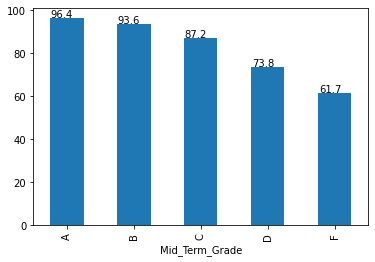

In [1012]:
#Visualizes persistence based on midterm grade
generate_percentage_plot(mid_terms, 'Mid_Term_Grade')

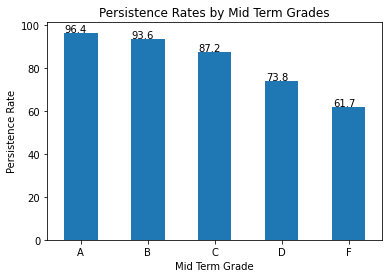

In [1044]:
#Plots a cleaner version of the above plot - quick fix - was easier to just redo than edit the modular code
data_to_plot = mid_terms.reset_index()
ax = data_to_plot.plot.bar(x = 'Mid_Term_Grade', y = 'percent', legend = False, rot=0)
ax.set_xlabel('Mid Term Grade')
ax.set_ylabel('Persistence Rate')
ax.set_title('Persistence Rates by Mid Term Grades')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [1025]:
#Calculates pearson correlation coefficient between midterms and final grades
midtermq = pd.DataFrame(df[['Mid_Term_Grade', 'Final_Grade']])
final_weight = {'A': 4, 'B': 3, 'C': 2, 'D': 1, 'F': 0, 'W': -1, 'QF': -1, 'W6': -1, 'WP': -1, 'WF': -1, 'P': -1, 'nan': -1, 'WH': -1, '84': 3}
midtermq.dropna(subset = ['Mid_Term_Grade'], inplace = True)
midtermq['mt_weight'] = midtermq['Mid_Term_Grade'].apply(lambda x: final_weight[x])
midtermq['fg_weight'] = midtermq['Final_Grade'].apply(lambda x: final_weight[x])
midtermq = midtermq[(midtermq['mt_weight'] >= 0) & (midtermq['fg_weight'] >= 0)]
midtermq.corr()

,mt_weight,fg_weight
mt_weight,1.000000,0.770611
fg_weight,0.770611,1.000000


<AxesSubplot:xlabel='Mid_Term_Grade'>

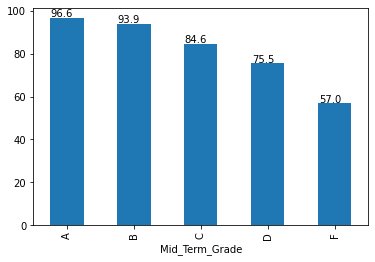

In [1009]:
#The following three cells repeat the midterm persistence calculations for each of the three student types:
#1. Comp Sci majors
mid_terms = generate_percentage_table(pd.DataFrame(visual_5[visual_5['CS_Student'] == True]), 'Mid_Term_Grade', 'persists')
generate_percentage_plot(mid_terms, 'Mid_Term_Grade')

<AxesSubplot:xlabel='Mid_Term_Grade'>

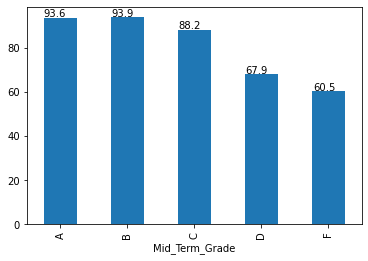

In [952]:
#2. IT Majors
mid_terms = generate_percentage_table(pd.DataFrame(visual_5[visual_5['IT_Student'] == True]), 'Mid_Term_Grade', 'persists')
generate_percentage_plot(mid_terms, 'Mid_Term_Grade')

<AxesSubplot:xlabel='Mid_Term_Grade'>

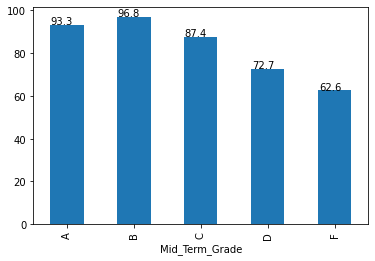

In [953]:
#3. CS to IT changers
mid_terms = generate_percentage_table(pd.DataFrame(visual_5[visual_5['CS_to_IT_Student'] == True]), 'Mid_Term_Grade', 'persists')
generate_percentage_plot(mid_terms, 'Mid_Term_Grade')

Question 6: How do demographic features like gender and race affect persistence?

In [954]:
#Extracts gender from grad info dataframe and adds it to the comprehensive df
def gender_lookup(student):
    student_record = grad_info[grad_info['EncryptId'] == student]
    lst = list(student_record['Gender'].unique())
    if len(lst) > 0:
        return lst[0]
    else:
        return None
df['Gender'] = df['EncryptId'].apply(lambda x: gender_lookup(x))
df.head()

,EncryptId,Subject,Course,Section,Term,Course_Hours_Attempted,Mid_Term_Grade,Final_Grade,Meeting_Days,Start_Time,...,persists,IT_Student,CS_Student,CS_to_IT_Student,course_lookup,modality,Mother_Ed,Father_Ed,Semester_Type,Gender
8,4124661,CSCI,3302,1,201110,3,NaN,C,MWF,1000.0,...,1,False,True,False,CSCI 3302 1 201110,Traditional|Face to face,NaN,NaN,10,M
9,4124661,CSCI,3331,1,201110,3,NaN,C,TR,930.0,...,1,False,True,False,CSCI 3331 1 201110,Traditional|Face to face,NaN,NaN,10,M
10,4124661,CSCI,3343,1,201110,3,NaN,F,TR,1100.0,...,1,False,True,False,CSCI 3343 1 201110,Traditional|Face to face,NaN,NaN,10,M
18,185083,CSCI,1302,1,201110,3,NaN,W6,MWF,800.0,...,0,False,False,False,CSCI 1302 1 201110,Traditional|Face to face,NaN,NaN,10,F
22,23547594,CSCI,3342,1,201110,3,NaN,B,MWF,1000.0,...,1,False,False,False,CSCI 3342 1 201110,Traditional|Face to face,NaN,NaN,10,M


In [955]:
#persistence calc by gender
gender = generate_percentage_table(df, 'Gender', 'persists')
gender

persists       percent
            sum count        
Gender                       
F          1580  1828    86.4
M          6722  7908    85.0

<AxesSubplot:xlabel='Gender'>

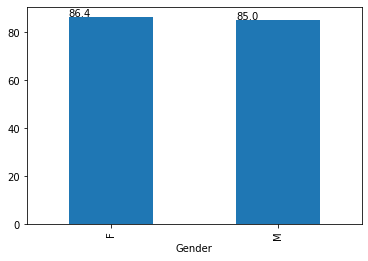

In [956]:
#persistence visual by gender
generate_percentage_plot(gender, 'Gender')

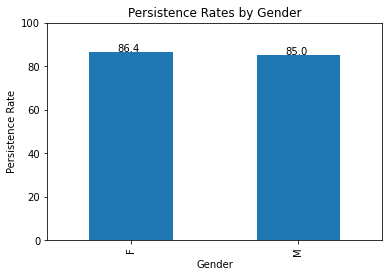

In [1032]:
#Just like the midterm grades this was a quick fix (easier to edit the visual here than edit the modular code)
data_to_plot = gender.reset_index()
ax = data_to_plot.plot.bar(x = 'Gender', y = 'percent', legend = False)
ax.set_xlabel('Gender')
ax.set_ylabel('Persistence Rate')
ax.set_title('Persistence Rates by Gender')
ax.set_ylim(0, 100)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.17 , p.get_height() * 1.005))

In [957]:
#Extracts race from grad info and adds to comprehensive df
def race_lookup(student):
    student_record = grad_info[grad_info['EncryptId'] == student]
    lst = list(student_record['Race_Ethnicity'].unique())
    if len(lst) > 0:
        return lst[0]
    else:
        return None
df['R_E'] = df['EncryptId'].apply(lambda x: race_lookup(x))
df.head()

,EncryptId,Subject,Course,Section,Term,Course_Hours_Attempted,Mid_Term_Grade,Final_Grade,Meeting_Days,Start_Time,...,IT_Student,CS_Student,CS_to_IT_Student,course_lookup,modality,Mother_Ed,Father_Ed,Semester_Type,Gender,R_E
8,4124661,CSCI,3302,1,201110,3,NaN,C,MWF,1000.0,...,False,True,False,CSCI 3302 1 201110,Traditional|Face to face,NaN,NaN,10,M,White
9,4124661,CSCI,3331,1,201110,3,NaN,C,TR,930.0,...,False,True,False,CSCI 3331 1 201110,Traditional|Face to face,NaN,NaN,10,M,White
10,4124661,CSCI,3343,1,201110,3,NaN,F,TR,1100.0,...,False,True,False,CSCI 3343 1 201110,Traditional|Face to face,NaN,NaN,10,M,White
18,185083,CSCI,1302,1,201110,3,NaN,W6,MWF,800.0,...,False,False,False,CSCI 1302 1 201110,Traditional|Face to face,NaN,NaN,10,F,Black or African American
22,23547594,CSCI,3342,1,201110,3,NaN,B,MWF,1000.0,...,False,False,False,CSCI 3342 1 201110,Traditional|Face to face,NaN,NaN,10,M,White


<AxesSubplot:xlabel='R_E'>

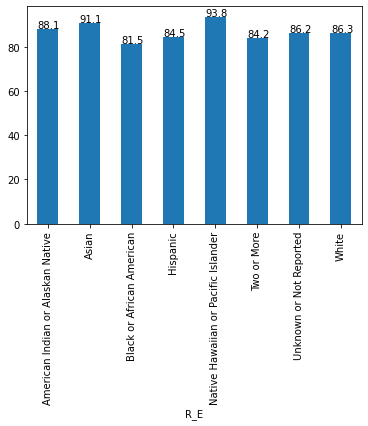

In [958]:
#Persistence calc and visual by race
race = generate_percentage_table(df, 'R_E', 'persists')
generate_percentage_plot(race, 'R_E')

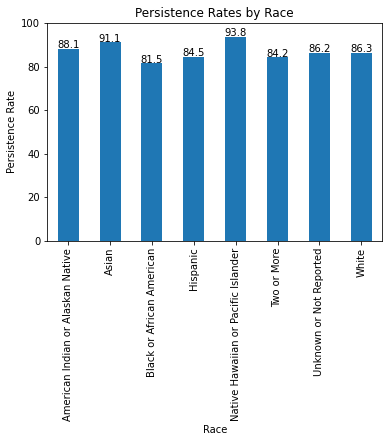

In [1039]:
#Quick fix to clean up race plot
data_to_plot = race.reset_index()
ax = data_to_plot.plot.bar(x = 'R_E', y = 'percent', legend = False)
ax.set_xlabel('Race')
ax.set_ylabel('Persistence Rate')
ax.set_title('Persistence Rates by Race')
ax.set_ylim(0, 100)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() - 0.02 , p.get_height() * 1.005))

In [959]:
#Extracts student type and adds to comprehensive df
def student_type_lookup(student):
    student_record = grad_info[grad_info['EncryptId'] == student]
    lst = list(student_record['Student_Type_Code'].unique())
    if len(lst) > 0:
        return lst[0]
    else:
        return None
df['STC'] = df['EncryptId'].apply(lambda x: student_type_lookup(x))
df.head()

,EncryptId,Subject,Course,Section,Term,Course_Hours_Attempted,Mid_Term_Grade,Final_Grade,Meeting_Days,Start_Time,...,CS_Student,CS_to_IT_Student,course_lookup,modality,Mother_Ed,Father_Ed,Semester_Type,Gender,R_E,STC
8,4124661,CSCI,3302,1,201110,3,NaN,C,MWF,1000.0,...,True,False,CSCI 3302 1 201110,Traditional|Face to face,NaN,NaN,10,M,White,M
9,4124661,CSCI,3331,1,201110,3,NaN,C,TR,930.0,...,True,False,CSCI 3331 1 201110,Traditional|Face to face,NaN,NaN,10,M,White,M
10,4124661,CSCI,3343,1,201110,3,NaN,F,TR,1100.0,...,True,False,CSCI 3343 1 201110,Traditional|Face to face,NaN,NaN,10,M,White,M
18,185083,CSCI,1302,1,201110,3,NaN,W6,MWF,800.0,...,False,False,CSCI 1302 1 201110,Traditional|Face to face,NaN,NaN,10,F,Black or African American,M
22,23547594,CSCI,3342,1,201110,3,NaN,B,MWF,1000.0,...,False,False,CSCI 3342 1 201110,Traditional|Face to face,NaN,NaN,10,M,White,M


<AxesSubplot:xlabel='STC'>

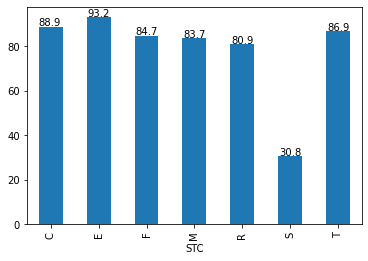

In [960]:
#persistence calc and visual by student type
data = pd.DataFrame(df[df['STC'] != '0'])
stc = generate_percentage_table(data, 'STC', 'persists')
generate_percentage_plot(stc, 'STC')

<AxesSubplot:xlabel='STC'>

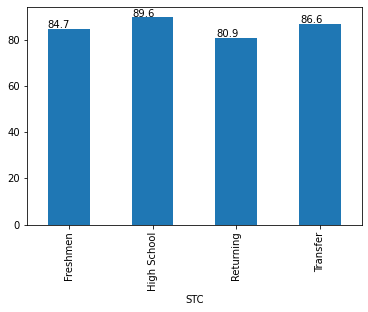

In [962]:
#consolidates student types into four key groups and redoes calculations and visuals
stc_combo = {'T': 'Transfer', 'M': 'M', '0': 'M', 'R': 'Returning', 'F': 'Freshmen', 'C': 'High School', 'E': 'High School', 'S': 'Transfer'}
data['STC'] = data['STC'].apply(lambda x: stc_combo[x])
data = data[data['STC'] != 'M']
stc = generate_percentage_table(data, 'STC', 'persists')
generate_percentage_plot(stc, 'STC')

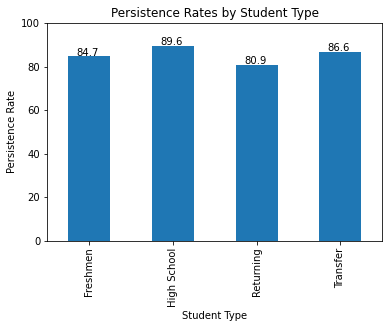

In [1040]:
#Quick fix to clean up student type visual
data_to_plot = stc.reset_index()
ax = data_to_plot.plot.bar(x = 'STC', y = 'percent', legend = False)
ax.set_xlabel('Student Type')
ax.set_ylabel('Persistence Rate')
ax.set_title('Persistence Rates by Student Type')
ax.set_ylim(0, 100)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.1 , p.get_height() * 1.005))

In [963]:
#Interpretation of student type code with description
studenttypes = pd.read_csv('output_files/student_types.csv')
studenttypes

,Student_Type_Code,Student_Type_Desc
0,T,Transfer Student
1,M,Missing data - NaN
2,R,UG-Returning Student
3,F,UG-New First Time Freshman
4,0,Undeclared
5,C,UG-Dual Credit Continuing - HS
6,S,UG-Transient
7,E,Early College Student
8,G,GR-New First Time Graduate


## CSIT 1300

In [964]:
df.head()

,EncryptId,Subject,Course,Section,Term,Course_Hours_Attempted,Mid_Term_Grade,Final_Grade,Meeting_Days,Start_Time,...,CS_Student,CS_to_IT_Student,course_lookup,modality,Mother_Ed,Father_Ed,Semester_Type,Gender,R_E,STC
8,4124661,CSCI,3302,1,201110,3,NaN,C,MWF,1000.0,...,True,False,CSCI 3302 1 201110,Traditional|Face to face,NaN,NaN,10,M,White,M
9,4124661,CSCI,3331,1,201110,3,NaN,C,TR,930.0,...,True,False,CSCI 3331 1 201110,Traditional|Face to face,NaN,NaN,10,M,White,M
10,4124661,CSCI,3343,1,201110,3,NaN,F,TR,1100.0,...,True,False,CSCI 3343 1 201110,Traditional|Face to face,NaN,NaN,10,M,White,M
18,185083,CSCI,1302,1,201110,3,NaN,W6,MWF,800.0,...,False,False,CSCI 1302 1 201110,Traditional|Face to face,NaN,NaN,10,F,Black or African American,M
22,23547594,CSCI,3342,1,201110,3,NaN,B,MWF,1000.0,...,False,False,CSCI 3342 1 201110,Traditional|Face to face,NaN,NaN,10,M,White,M


In [965]:
df.columns

Index(['EncryptId', 'Subject', 'Course', 'Section', 'Term',
       'Course_Hours_Attempted', 'Mid_Term_Grade', 'Final_Grade',
       'Meeting_Days', 'Start_Time', 'End_Time', 'Course_Old', 'persists',
       'IT_Student', 'CS_Student', 'CS_to_IT_Student', 'course_lookup',
       'modality', 'Mother_Ed', 'Father_Ed', 'Semester_Type', 'Gender', 'R_E',
       'STC'],
      dtype='object')

In [966]:
#Finds all records pertaining to IT 1300
it1300 = pd.DataFrame(df[(df['Subject'] == 'CSIT') & (df['Course'] == '1300')])
it1300.head()

,EncryptId,Subject,Course,Section,Term,Course_Hours_Attempted,Mid_Term_Grade,Final_Grade,Meeting_Days,Start_Time,...,CS_Student,CS_to_IT_Student,course_lookup,modality,Mother_Ed,Father_Ed,Semester_Type,Gender,R_E,STC
31104,3530049,CSIT,1300,1,201910,3,B,B,MW,1300.0,...,True,True,CSIT 1300 1 201910,Traditional|Face to face,1.0,1.0,10,F,White,R
31160,22468137,CSIT,1300,1,201910,3,B,A,MW,1300.0,...,False,False,CSIT 1300 1 201910,Traditional|Face to face,1.0,0.0,10,M,White,T
31166,22348126,CSIT,1300,1,201910,3,A,A,MW,1300.0,...,True,True,CSIT 1300 1 201910,Traditional|Face to face,0.0,0.0,10,M,Unknown or Not Reported,T
31190,24835428,CSIT,1300,1,201910,3,B,B,MW,1300.0,...,True,True,CSIT 1300 1 201910,Traditional|Face to face,0.0,2.0,10,M,White,F
31198,28908995,CSIT,1300,1,201910,3,B,B,MW,1300.0,...,False,False,CSIT 1300 1 201910,Traditional|Face to face,1.0,2.0,10,M,White,T


In [967]:
#Finds number of students who persist based on their final grade in IT 1300
it1300.groupby('Final_Grade').agg({'EncryptId': 'count', 'persists': 'sum'})

,EncryptId,persists
Final_Grade,,
A,29,29
B,30,27
C,17,17
D,6,3
F,5,0
QF,4,1
W6,1,1


In [968]:
df['Subject'].unique()

array(['CSCI', 'COSC', 'BCIS', 'CSIT'], dtype=object)

In [969]:
len(it1300)

94

In [970]:
#Persistence for the course
it1300['persists'].sum()/len(it1300)*100

82.97872340425532

In [971]:
it1300.columns

Index(['EncryptId', 'Subject', 'Course', 'Section', 'Term',
       'Course_Hours_Attempted', 'Mid_Term_Grade', 'Final_Grade',
       'Meeting_Days', 'Start_Time', 'End_Time', 'Course_Old', 'persists',
       'IT_Student', 'CS_Student', 'CS_to_IT_Student', 'course_lookup',
       'modality', 'Mother_Ed', 'Father_Ed', 'Semester_Type', 'Gender', 'R_E',
       'STC'],
      dtype='object')

In [972]:
#Compares persistence by gender in it
gender_it = it1300.groupby('Gender').agg({'persists': ['count', 'sum']})
gender_it['percent'] = gender_it['persists']['sum'] / gender_it['persists']['count'] * 100

In [973]:
gender_it

persists        percent
          count sum           
Gender                        
F            24  18  75.000000
M            70  60  85.714286

In [974]:
#Calculates persistence rate by midterm grade in IT 1300 and this is where I realized there was such a discrepancy in 
#persistence for students getting a C or higher vs a D or lower
mid_it = it1300.groupby('Mid_Term_Grade').agg({'persists': ['count', 'sum']})
mid_it['percent'] = mid_it['persists']['sum'] / mid_it['persists']['count'] * 100

In [975]:
mid_it

persists        percent
                  count sum           
Mid_Term_Grade                        
A                    36  35  97.222222
B                    25  23  92.000000
C                    14  12  85.714286
D                    10   6  60.000000
F                     6   1  16.666667

## Retaking

In [976]:
df.head()

,EncryptId,Subject,Course,Section,Term,Course_Hours_Attempted,Mid_Term_Grade,Final_Grade,Meeting_Days,Start_Time,...,CS_Student,CS_to_IT_Student,course_lookup,modality,Mother_Ed,Father_Ed,Semester_Type,Gender,R_E,STC
8,4124661,CSCI,3302,1,201110,3,NaN,C,MWF,1000.0,...,True,False,CSCI 3302 1 201110,Traditional|Face to face,NaN,NaN,10,M,White,M
9,4124661,CSCI,3331,1,201110,3,NaN,C,TR,930.0,...,True,False,CSCI 3331 1 201110,Traditional|Face to face,NaN,NaN,10,M,White,M
10,4124661,CSCI,3343,1,201110,3,NaN,F,TR,1100.0,...,True,False,CSCI 3343 1 201110,Traditional|Face to face,NaN,NaN,10,M,White,M
18,185083,CSCI,1302,1,201110,3,NaN,W6,MWF,800.0,...,False,False,CSCI 1302 1 201110,Traditional|Face to face,NaN,NaN,10,F,Black or African American,M
22,23547594,CSCI,3342,1,201110,3,NaN,B,MWF,1000.0,...,False,False,CSCI 3342 1 201110,Traditional|Face to face,NaN,NaN,10,M,White,M


In [977]:
#Returns quality points for GPA based on letter grade
final_weight = {'A': 4, 'B': 3, 'C': 2, 'D': 1, 'F': 0, 'W': -1, 'QF': -1, 'W6': -1, 'WP': -1, 'WF': -1, 'P': -1, 'nan': -1}

In [978]:
#removes records where final grade is missing
df.dropna(subset = ['Final_Grade'], inplace= True)

In [979]:
#Creates a column with a 1 if a student will retake the course and a 2 if the record is that of a student retaking a course
#If the student doesn't ever retake (1 attempt on the course only), they get a 0
#This method also makes a column that transfers the final grade from letter to a number
df['retake'] = -1
df['weight'] = 10

for index, row in df.iterrows():
    student = row['EncryptId']
    sub = row['Subject']
    course = row['Course']
    term = row['Term']

    df.at[index, 'weight'] = final_weight[row['Final_Grade']]
    
    stu_attempts = pd.DataFrame(df[(df['EncryptId'] == student) & (df['Subject'] == sub) & (df['Course'] == course)])
    
    if len(stu_attempts) > 1:
        terms = list(stu_attempts['Term'].unique())
        terms.sort()
        if terms.index(term) > 0:
            df.at[index, 'retake'] = 2
        else:
            df.at[index, 'retake'] = 1
    else:
        df.at[index, 'retake'] = 0

In [980]:
#Only considers records where the student got a A B C D or F
df = df[df['weight'] >= 0]

In [981]:
#Average outcome for a student based on if they will retake or are retaking
df.groupby('retake').agg({'weight': np.mean})

,weight
retake,
0,2.965031
1,0.514535
2,1.954721


In [984]:
#groups by final grade and if they will retake or are retaking
retake = df[df['retake'] > 0]
retake = retake.groupby(['retake', 'Final_Grade']).agg({'EncryptId': 'count'})
retake_pct = retake.groupby(level=0).apply(lambda x: x / x.sum() * 100)

In [985]:
retake_pct

EncryptId
retake Final_Grade           
1      A             0.581395
       B             0.436047
       C             2.180233
       D            43.459302
       F            53.343023
2      A            10.886320
       B            25.722543
       C            29.672447
       D            15.414258
       F            18.304432

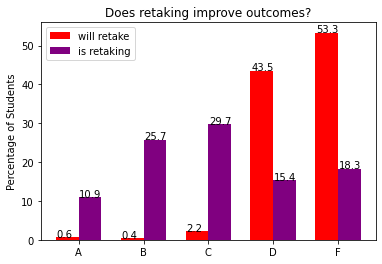

In [987]:
#Generates plot of grade distributions for students who will go on to retake versus those retake attempts
retake = pd.DataFrame(retake_pct.reset_index())
retake['EncryptId'] = retake['EncryptId'].round(1)
will_retake = retake[retake['retake'] == 1]
is_retake = retake[retake['retake'] == 2]

ind = np.arange(5)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, will_retake['EncryptId'], width, color = 'red')

rects2 = ax.bar(ind+width, is_retake['EncryptId'], width, color = 'purple')

# add some
ax.set_ylabel('Percentage of Students')
ax.set_title('Does retaking improve outcomes?')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(will_retake['Final_Grade'])

ax.legend( (rects1[0], rects2[0]), ('will retake', 'is retaking') )

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

## What high schools are most common?

In [833]:
grad_info.columns

Index(['Unnamed: 0', 'EncryptId', 'Gender', 'Race_Ethnicity',
       'First_Enroll_Term', 'Grad_Date', 'Grad_Term', 'Grad_Program',
       'In_State_Res_Indicator', 'Student_Type_Code', 'Admit_Code',
       'Incoming_GPA', 'Incoming_SFA_Hours', 'First_Gen_Status',
       'Fathers_Highest_Ed_Lvl', 'Mothers_Highest_Ed_Lvl', 'Old_SAT_Total',
       'New_SAT_Total', 'ACT_Composite', 'High_School_Percentile',
       'High_School_Name', 'High_School_Grad_Date', 'TSI', 'Veteran_Indicator',
       'Entrance_Exam'],
      dtype='object')

In [834]:
#Redefines CS Grad method for readability
def cs_grad(degree):
    if (degree == 'BA in Information Technology') | (degree == 'BS in Computer Science') | (degree == 'BS in Computer Info Systems') | (degree == 'BBA in Computer Info Systems'):
        return 1
    else:
        return 0
grad_info['CS'] = grad_info['Grad_Program'].apply(lambda x: cs_grad(x))
grad_info['CS'].unique()

array([0, 1])

In [835]:
#Finds 1 record for every student that was a graduate of CS Department
cs_students = pd.DataFrame(grad_info[grad_info['CS'] == 1])
cs_students.drop_duplicates(subset = 'EncryptId', keep = 'last', inplace = True)

In [841]:
#Calculates and displays the top 25 highschools and how many graduates we have had from each
high_schools = cs_students.groupby('High_School_Name').agg({'EncryptId': 'count'})
high_schools.sort_values(by='EncryptId', inplace = True, ascending = False)
high_schools.head(25)

,EncryptId
High_School_Name,
Nacogdoches High School,22
Lufkin High School,17
Huntington High School,5
Duncanville High School,5
Central Heights High School,5
Center High School,5
Hudson High School,5
Joaquin High School,4
Dayton High School,4
